In [1]:
# import corner
import numpy as np
from matplotlib import pyplot as plt
import json
from tqdm.notebook import tqdm
import sys

sys.path.append("../")

import tdpy

from binary_planets.sim import get_hill_radius

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Computer Modern Roman",
  "font.size":    12.0
})

%matplotlib inline

In [2]:
# n = 2000
# run_systems = np.load("../data/compact_systems_run_composite.npy", allow_pickle=True)

# # dirs = ["no_inj", "sin_inj", "bin_inj"]
# dirs = ["bin_inj"]

# # dirs = ["detailed_no", "detailed_sing", "detailed_bin"]
# # dirs = ["binary_inj"]

# systems = [sys["name"] for sys in run_systems]
# # systems = ["TOI-1246"]

# results = {}
    
# # dirs = ["composite_no", "composite_sing", "composite_bin"]

# # dirs =["no_inj"]
# # systems=["Kepler-150"]


# for dir in tqdm(dirs, position=0):
#     results[dir] = {}
#     for system in tqdm(systems, position=1):
#         results[dir][system] = {}

#         n_act = 0
#         none_survived = False
#         try:
#             with open(f"../output/{dir}/{system}/NONE_SURVIVED.txt") as f:
#                 n_act = f.readline()
#                 none_survived = True
#         except Exception as e:
#             pass

#         if not none_survived:
#             for i in tqdm(range(1, n), position=2):
#                 try:
#                     summary = np.load(f"../output/{dir}/{system}/{i}/summary.npy")
#                     with open(f"../output/{dir}/{system}/{i}/config.json") as f:
#                         cfg = json.load(f)
#                     elements = np.load(f"../output/{dir}/{system}/{i}/elements.npy")
#                     if n_act==0:
#                         results[dir][system]["a_i"] = elements[0,:,0]
#                         results[dir][system]["a_f"] = elements[-1,:,0]
#                         if dir[:3] == "bin":
#                             results[dir][system]["bin_m1"] = [cfg["binary"]["m1"]]
#                             results[dir][system]["bin_m2"] = [cfg["binary"]["m2"]]
#                             results[dir][system]["bin_esys"] = [cfg["binary"]["e_sys"]]
#                             results[dir][system]["bin_e"] = [cfg["binary"]["e"]]
#                             results[dir][system]["bin_d"] = [cfg["binary"]["d"]]
#                             results[dir][system]["bin_a"] = [cfg["binary"]["a"]]
#                         results[dir][system]["stable"] = []

#                     else:
#                         results[dir][system]["a_i"] = np.vstack(
#                             (results[dir][system]["a_i"], elements[0,:,0]))
#                         results[dir][system]["a_f"] = np.vstack(
#                             (results[dir][system]["a_f"], elements[-1,:,0]))
#                         if dir[:3] == "bin":
#                             results[dir][system]["bin_m1"].append(cfg["binary"]["m1"])
#                             results[dir][system]["bin_m2"].append(cfg["binary"]["m2"])
#                             results[dir][system]["bin_esys"].append(cfg["binary"]["e_sys"])
#                             results[dir][system]["bin_e"].append(cfg["binary"]["e"])
#                             results[dir][system]["bin_d"].append(cfg["binary"]["d"])
#                             results[dir][system]["bin_a"].append(cfg["binary"]["a"])

#                     n_act += 1
#                     a_i, a_f =  results[dir][system]["a_i"][-1],  results[dir][system]["a_f"][-1]

#                     stable = np.all(((a_i-a_f)/a_i) < 0.1)

#                     if "bin" in dir:
#                         distances = np.load(f"../output/{dir}/{system}/{i}/distances.npy")
#                         bin_e = cfg["binary"]["e"]
#                         bin_a = a_i[1]
#                         max_d = 1.1 * bin_a * (1 + bin_e)
#                         if np.any(distances > max_d):
#                             stable = False
                    
#                     results[dir][system]["stable"].append(stable)
                    
#                 except Exception as e:
# #                     print(e)
#                     pass
#             try:
#                 if dir[:3] == "bin":                
#                     results[dir][system]["bin_m1"] = np.array(results[dir][system]["bin_m1"])
#                     results[dir][system]["bin_m2"] = np.array(results[dir][system]["bin_m2"])
#                     results[dir][system]["bin_esys"] = np.array(results[dir][system]["bin_esys"])
#                     results[dir][system]["bin_e"] = np.array(results[dir][system]["bin_e"])
#                     results[dir][system]["bin_d"] = np.array(results[dir][system]["bin_d"])
#                     results[dir][system]["bin_a"] = np.array(results[dir][system]["bin_a"])
#                 print(system, n_act)
#             except:
#                 pass
#             try:
#                 a_i, a_f =  results[dir][system]["a_i"],  results[dir][system]["a_f"]
                
#                 norm = np.max(((a_i-a_f)/a_i), axis=1)
                
#                 results[dir][system]["norm"] = norm
                
#                 results[dir][system]["n_survived"] = np.sum(results[dir][system]["stable"])
#                 results[dir][system]["n_act"] = n_act
#                 results[dir][system]["survival_frac"] = results[dir][system]["n_survived"]/n_act
#                 print(f"\n\n{system} Survival Fraction: {results[dir][system]['survival_frac']} for {n_act} systems")
#             except Exception as e:
#                 print(f"Error processing {system}: {e}")
#                 results[dir][system]["n_survived"] = np.nan
#                 results[dir][system]["n_act"] = np.nan
#                 results[dir][system]["survival_frac"] = np.nan
                
#         else:
#                 print(f"NONE SURVIVED in {system}")
#                 results[dir][system]["n_survived"] = 0
#                 results[dir][system]["n_act"] = int(n_act)
#                 results[dir][system]["survival_frac"] = 0
                
            
    


In [3]:
n = 3000
run_systems = np.load("../data/compact_systems_run_composite.npy", allow_pickle=True)

# dirs = ["no_inj", "sin_inj", "bin_inj"]
dirs = ["sin_inj", "bin_inj"]

# dirs = ["detailed_no", "detailed_sing", "detailed_bin"]
# dirs = ["bin_inj"]

systems = [sys["name"] for sys in run_systems if sys["name"] != "Kepler-324"]
# systems = ["TOI-1246"]

results = {}
    
# dirs = ["composite_no", "composite_sing", "composite_bin"]

# dirs =["no_inj"]
# systems=["Kepler-150"]





for dir in tqdm(dirs, position=0):
    results[dir] = {}
    for system in tqdm(systems, position=1):
        results[dir][system] = {}

        n_act = 0
        none_survived = False
        cached_data =  np.load(f"../output/{dir}/{system}/collated_results.npz", allow_pickle=True)
        cached_summaries = cached_data["summaries"]
        cached_cfgs = cached_data["cfgs"]
        cached_elements = cached_data["elements"]
        cached_distances = cached_data["distances"]
        
        if not none_survived:
            for i in tqdm(range(1, n), position=2):
                try:
                    summary = cached_summaries[i]
                    cfg = cached_cfgs[i]
                    elements = cached_elements[i]
                    
                    if n_act==0:
                        results[dir][system]["a_i"] = elements[0,:,0]
                        results[dir][system]["a_f"] = elements[-1,:,0]
                        if dir[:3] == "bin":
                            results[dir][system]["bin_m1"] = [cfg["binary"]["m1"]]
                            results[dir][system]["bin_m2"] = [cfg["binary"]["m2"]]
                            results[dir][system]["bin_esys"] = [cfg["binary"]["e_sys"]]
                            results[dir][system]["bin_e"] = [cfg["binary"]["e"]]
                            results[dir][system]["bin_d"] = [cfg["binary"]["d"]]
                            results[dir][system]["bin_a"] = [cfg["binary"]["a"]]
                        results[dir][system]["stable"] = []

                    else:
                        results[dir][system]["a_i"] = np.vstack(
                            (results[dir][system]["a_i"], elements[0,:,0]))
                        results[dir][system]["a_f"] = np.vstack(
                            (results[dir][system]["a_f"], elements[-1,:,0]))
                        if dir[:3] == "bin":
                            results[dir][system]["bin_m1"].append(cfg["binary"]["m1"])
                            results[dir][system]["bin_m2"].append(cfg["binary"]["m2"])
                            results[dir][system]["bin_esys"].append(cfg["binary"]["e_sys"])
                            results[dir][system]["bin_e"].append(cfg["binary"]["e"])
                            results[dir][system]["bin_d"].append(cfg["binary"]["d"])
                            results[dir][system]["bin_a"].append(cfg["binary"]["a"])

                    n_act += 1
                    a_i, a_f =  results[dir][system]["a_i"][-1],  results[dir][system]["a_f"][-1]

                    stable = np.all(((a_i-a_f)/a_i) < 0.1)

                    if "bin" in dir:
                        distances = cached_distances[i]
                        bin_e = cfg["binary"]["e"]
                        bin_a = a_i[1]
                        
                        hill_radius = get_hill_radius(bin_a, 
                              cfg["binary"]["e_sys"], 
                              cfg["binary"]["m1"] + cfg["binary"]["m2"], 
                              cfg["m_star"])
                        
#                         print(bin_a)
#                         print(cfg["binary"]["e_sys"])
#                         print(cfg["binary"]["m1"] + cfg["binary"]["m2"])
#                         print(cfg["m_star"])
#                         print(distances)
#                         print(np.max(distances), hill_radius)
                        
#                         break
                        
                        
                        
                        max_d = 1.1 * bin_a * (1 + bin_e)
                        max_d = 1.1 * hill_radius
                        if np.any(distances > max_d):
#                             print(np.nanmax(distances), hill_radius)
                            stable = False
                    
                    results[dir][system]["stable"].append(stable)
                    
                except Exception as e:
#                     print(e)
                    pass
            try:
                if dir[:3] == "bin":                
                    results[dir][system]["bin_m1"] = np.array(results[dir][system]["bin_m1"])
                    results[dir][system]["bin_m2"] = np.array(results[dir][system]["bin_m2"])
                    results[dir][system]["bin_esys"] = np.array(results[dir][system]["bin_esys"])
                    results[dir][system]["bin_e"] = np.array(results[dir][system]["bin_e"])
                    results[dir][system]["bin_d"] = np.array(results[dir][system]["bin_d"])
                    results[dir][system]["bin_a"] = np.array(results[dir][system]["bin_a"])
                print(system, n_act)
            except:
                pass
            try:
                a_i, a_f =  results[dir][system]["a_i"],  results[dir][system]["a_f"]
                
                norm = np.max(((a_i-a_f)/a_i), axis=1)
                
                results[dir][system]["norm"] = norm
                
                results[dir][system]["n_survived"] = np.sum(results[dir][system]["stable"])
                results[dir][system]["n_act"] = n_act
                results[dir][system]["survival_frac"] = results[dir][system]["n_survived"]/n_act
                print(f"\n\n{system} Survival Fraction: {results[dir][system]['survival_frac']} for {n_act} systems")
            except Exception as e:
                print(f"Error processing {system}: {e}")
                results[dir][system]["n_survived"] = np.nan
                results[dir][system]["n_act"] = np.nan
                results[dir][system]["survival_frac"] = np.nan
                
        else:
                print(f"NONE SURVIVED in {system}")
                results[dir][system]["n_survived"] = 0
                results[dir][system]["n_act"] = int(n_act)
                results[dir][system]["survival_frac"] = 0
                
            
    


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/2999 [00:00<?, ?it/s]

HD 108236 2998


HD 108236 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

HD 23472 2998


HD 23472 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-133 2998


K2-133 Survival Fraction: 0.0023348899266177454 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-138 2998


K2-138 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-187 2998


K2-187 Survival Fraction: 0.014009339559706471 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-285 2998


K2-285 Survival Fraction: 0.005670446964643095 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-72 2998


K2-72 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

KOI-351 2998


KOI-351 Survival Fraction: 0.0010006671114076052 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-102 2998


Kepler-102 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-106 2998


Kepler-106 Survival Fraction: 0.004002668445630421 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-107 2998


Kepler-107 Survival Fraction: 0.0020013342228152103 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-11 2998


Kepler-11 Survival Fraction: 0.00133422281521014 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-122 2998


Kepler-122 Survival Fraction: 0.001667778519012675 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-1388 2998


Kepler-1388 Survival Fraction: 0.004336224149432955 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-150 1590


Kepler-150 Survival Fraction: 0.04213836477987421 for 1590 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-154 2998


Kepler-154 Survival Fraction: 0.0063375583722481655 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-1542 2998


Kepler-1542 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-164 2998


Kepler-164 Survival Fraction: 0.011674449633088725 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-169 2998


Kepler-169 Survival Fraction: 0.014009339559706471 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-172 2998


Kepler-172 Survival Fraction: 0.009006004002668445 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-176 2998


Kepler-176 Survival Fraction: 0.00533689126084056 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-186 2732


Kepler-186 Survival Fraction: 0.02562225475841874 for 2732 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-1987 2998


Kepler-1987 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-208 2998


Kepler-208 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-215 2998


Kepler-215 Survival Fraction: 0.004336224149432955 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-220 2998


Kepler-220 Survival Fraction: 0.009006004002668445 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-221 2998


Kepler-221 Survival Fraction: 0.00333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-223 2998


Kepler-223 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-224 2998


Kepler-224 Survival Fraction: 0.00133422281521014 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-235 2998


Kepler-235 Survival Fraction: 0.00733822548365577 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-238 2998


Kepler-238 Survival Fraction: 0.007004669779853236 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-24 1916


Kepler-24 Survival Fraction: 0.0 for 1916 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-245 2998


Kepler-245 Survival Fraction: 0.007004669779853236 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-251 2998


Kepler-251 Survival Fraction: 0.013675783855903937 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-256 2998


Kepler-256 Survival Fraction: 0.003669112741827885 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-26 2998


Kepler-26 Survival Fraction: 0.005670446964643095 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-265 2998


Kepler-265 Survival Fraction: 0.0066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-282 2998


Kepler-282 Survival Fraction: 0.0020013342228152103 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-286 2981


Kepler-286 Survival Fraction: 0.019792016101979202 for 2981 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-292 2998


Kepler-292 Survival Fraction: 0.001667778519012675 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-299 2998


Kepler-299 Survival Fraction: 0.008005336891260841 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-304 2998


Kepler-304 Survival Fraction: 0.0023348899266177454 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-305 2998


Kepler-305 Survival Fraction: 0.0020013342228152103 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-306 2998


Kepler-306 Survival Fraction: 0.007671781187458306 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-32 2998


Kepler-32 Survival Fraction: 0.0066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-33 2998


Kepler-33 Survival Fraction: 0.004669779853235491 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-338 2998


Kepler-338 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-341 2998


Kepler-341 Survival Fraction: 0.004336224149432955 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-342 2997


Kepler-342 Survival Fraction: 0.020353687020353686 for 2997 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-37 2998


Kepler-37 Survival Fraction: 0.003669112741827885 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-402 2998


Kepler-402 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-49 2998


Kepler-49 Survival Fraction: 0.00266844563042028 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-55 2998


Kepler-55 Survival Fraction: 0.0020013342228152103 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-58 2998


Kepler-58 Survival Fraction: 0.00600400266844563 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-62 2998


Kepler-62 Survival Fraction: 0.011007338225483656 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-758 2998


Kepler-758 Survival Fraction: 0.0010006671114076052 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-79 2998


Kepler-79 Survival Fraction: 0.003669112741827885 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-82 2998


Kepler-82 Survival Fraction: 0.016010673782521682 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-84 2998


Kepler-84 Survival Fraction: 0.001667778519012675 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-85 2998


Kepler-85 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-1246 2998


TOI-1246 Survival Fraction: 0.0063375583722481655 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-178 2998


TOI-178 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-561 2023


TOI-561 Survival Fraction: 0.029658922392486405 for 2023 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-700 2998


TOI-700 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TRAPPIST-1 2998


TRAPPIST-1 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/2999 [00:00<?, ?it/s]

HD 108236 2998


HD 108236 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

HD 23472 2998


HD 23472 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-133 2998


K2-133 Survival Fraction: 0.003669112741827885 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-138 2998


K2-138 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-187 2464


K2-187 Survival Fraction: 0.0 for 2464 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-285 2998


K2-285 Survival Fraction: 0.00333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

K2-72 2998


K2-72 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

KOI-351 2998


KOI-351 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-102 2998


Kepler-102 Survival Fraction: 0.00133422281521014 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-106 2998


Kepler-106 Survival Fraction: 0.00266844563042028 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-107 2998


Kepler-107 Survival Fraction: 0.00133422281521014 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-11 2998


Kepler-11 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-122 2998


Kepler-122 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-1388 2998


Kepler-1388 Survival Fraction: 0.001667778519012675 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-150 1274


Kepler-150 Survival Fraction: 0.0 for 1274 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-154 2998


Kepler-154 Survival Fraction: 0.004002668445630421 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-1542 189


Kepler-1542 Survival Fraction: 0.0 for 189 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-164 2998


Kepler-164 Survival Fraction: 0.008338892595063376 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-169 2998


Kepler-169 Survival Fraction: 0.0063375583722481655 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-172 2998


Kepler-172 Survival Fraction: 0.005003335557038025 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-176 2998


Kepler-176 Survival Fraction: 0.004002668445630421 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-186 2148


Kepler-186 Survival Fraction: 0.020484171322160148 for 2148 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-1987 2998


Kepler-1987 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-208 2998


Kepler-208 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-215 2998


Kepler-215 Survival Fraction: 0.00333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-220 2998


Kepler-220 Survival Fraction: 0.003669112741827885 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-221 2998


Kepler-221 Survival Fraction: 0.0010006671114076052 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-223 2998


Kepler-223 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-224 2998


Kepler-224 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-235 2998


Kepler-235 Survival Fraction: 0.00533689126084056 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-238 2998


Kepler-238 Survival Fraction: 0.004002668445630421 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-24 2998


Kepler-24 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-245 2998


Kepler-245 Survival Fraction: 0.003002001334222815 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-251 2998


Kepler-251 Survival Fraction: 0.00867244829886591 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-256 2998


Kepler-256 Survival Fraction: 0.00266844563042028 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-26 2998


Kepler-26 Survival Fraction: 0.004002668445630421 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-265 2998


Kepler-265 Survival Fraction: 0.00266844563042028 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-282 2998


Kepler-282 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-286 2937


Kepler-286 Survival Fraction: 0.010895471569628872 for 2937 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-292 2998


Kepler-292 Survival Fraction: 0.00133422281521014 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-299 2998


Kepler-299 Survival Fraction: 0.0063375583722481655 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-304 2998


Kepler-304 Survival Fraction: 0.00133422281521014 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-305 2998


Kepler-305 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-306 2998


Kepler-306 Survival Fraction: 0.003002001334222815 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-32 2998


Kepler-32 Survival Fraction: 0.009673115410273516 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-33 2998


Kepler-33 Survival Fraction: 0.003669112741827885 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-338 2998


Kepler-338 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-341 2998


Kepler-341 Survival Fraction: 0.003669112741827885 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-342 2995


Kepler-342 Survival Fraction: 0.01702838063439065 for 2995 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-37 2998


Kepler-37 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-402 2998


Kepler-402 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-49 2998


Kepler-49 Survival Fraction: 0.001667778519012675 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-55 2998


Kepler-55 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-58 2998


Kepler-58 Survival Fraction: 0.004336224149432955 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-62 2976


Kepler-62 Survival Fraction: 0.010416666666666666 for 2976 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-758 2998


Kepler-758 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-79 2998


Kepler-79 Survival Fraction: 0.000333555703802535 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-82 2997


Kepler-82 Survival Fraction: 0.007007007007007007 for 2997 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-84 2998


Kepler-84 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

Kepler-85 2993


Kepler-85 Survival Fraction: 0.0 for 2993 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-1246 2998


TOI-1246 Survival Fraction: 0.0066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-178 2998


TOI-178 Survival Fraction: 0.00066711140760507 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-561 2710


TOI-561 Survival Fraction: 0.013653136531365314 for 2710 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TOI-700 2998


TOI-700 Survival Fraction: 0.0 for 2998 systems


  0%|          | 0/2999 [00:00<?, ?it/s]

TRAPPIST-1 2998


TRAPPIST-1 Survival Fraction: 0.0 for 2998 systems


In [4]:
results["bin_inj"]

{'HD 108236': {'a_i': array([[0.1108528 , 0.10055862, 0.04554142, ..., 0.10934186, 0.13668666,
          0.17218679],
         [0.07848756, 0.06563329, 0.0445355 , ..., 0.10752185, 0.13663288,
          0.1738177 ],
         [0.08740196, 0.09009323, 0.04527686, ..., 0.10850487, 0.13577516,
          0.17521523],
         ...,
         [0.08332311, 0.09533623, 0.04574036, ..., 0.10874042, 0.13829894,
          0.17810972],
         [0.0862434 , 0.0944884 , 0.04559959, ..., 0.10848342, 0.13589299,
          0.17631926],
         [0.0682259 , 0.06535686, 0.04600655, ..., 0.1072086 , 0.13569992,
          0.1770468 ]]),
  'a_f': array([[nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         ...,
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan],
         [nan, nan, nan, ..., nan, nan, nan]]),
  'bin_m1': array([22.31357094, 11.61904096,  0.88677533, ..., 18.90597813,
 

In [5]:
np.savez("results.npz", results)
# with open("large_sample.json", "w+") as f:""
#     json.dump(results, f)

In [2]:
# n = 10000
# run_systems = np.load("../data/compact_systems_run.npy", allow_pickle=True)

# # dirs = ["no_inj", "single_inj", "binary_inj"]
# dirs = ["no_inj_large_sample", "single_inj_large_sample", "binary_inj"]
# # dirs = ["binary_inj"]

# systems = [sys["name"] for sys in run_systems]
# # systems = ["TOI-1246"]

# with open("large_sample.json") as f:
#     results = json.load(f)
dirs = ["no_inj", "sin_inj", "bin_inj"]

run_systems = np.load("../data/compact_systems_run_composite.npy", allow_pickle=True)

dirs = ["no_inj", "sin_inj", "bin_inj"]
# dirs = ["bin_inj"]

# dirs = ["detailed_no", "detailed_sing", "detailed_bin"]
# dirs = ["binary_inj"]

systems = [sys["name"] for sys in run_systems]

results = np.load("results.npz", allow_pickle=True)
results = np.atleast_1d(results[results.files[0]])[0]

results_bin = np.load("results2.npz", allow_pickle=True)
results_bin = np.atleast_1d(results_bin[results_bin.files[0]])[0]

results["bin_inj"] = results_bin["bin_inj"]

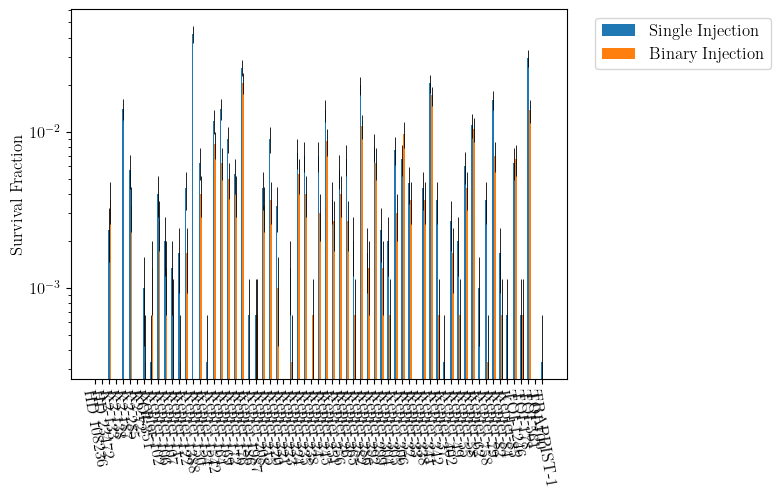

In [5]:
# plt.style.use("seaborn-deep")
# no_dir = dirs[0]
single_dir = dirs[0]
binary_dir = dirs[1]

cutoff = 0
# no_inj = [results[no_dir][system]["survival_frac"] for system in systems]
single_inj = [results[single_dir][system]["survival_frac"] for system in systems]
binary_inj = [results[binary_dir][system]["survival_frac"] for system in systems]


# no_inj_err = [np.sqrt(results[no_dir][system]["n_survived"])/(float(results[no_dir][system]["n_act"])) for system in systems]
single_inj_err = [np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems]
binary_inj_err = [np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems]

width = 0.25
# width = 0.7
xs = np.arange(len(single_inj))
plt.plot(figsize=(30,10))
# plt.bar(xs, no_inj, width=width, label="No Injection")
# plt.errorbar(xs, no_inj, no_inj_err, c="k", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+width, single_inj, width=width, label="Single Injection")
plt.errorbar(xs+width, single_inj, single_inj_err, c="k", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+2*width, binary_inj, width=width, label="Binary Injection")
plt.errorbar(xs+2*width, binary_inj, binary_inj_err, c="k", fmt=".", lw=0.6, markersize=0)

plt.xticks(xs+width, systems, rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
# plt.savefig("../figs/survival_frac2.png")
plt.show()

In [18]:
large_gap = np.array([sys["gap"][1]/sys["gap"][0] > 1.95 for sys in run_systems if sys["name"] != "Kepler-324"])
np.sum(large_gap)

21

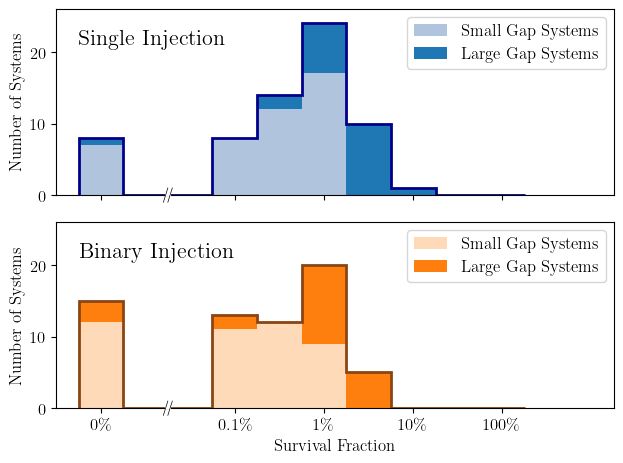

In [33]:
single_inj_hist = np.array(single_inj)
single_inj_hist[single_inj_hist < 1e-4] = 10**(-4.7)

# no_inj_hist = np.array(no_inj)
# no_inj_hist[no_inj_hist < 1e-4] = 10**(-4.7)

binary_inj_hist = np.array(binary_inj)
binary_inj_hist[binary_inj_hist < 1e-4] = 10**(-4.7)

colors = ["grey", "blue", "red"]

bins = [-5, -4.5, -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0]

# plt.subplots(nrows=2, ncols=1)

# plt.hist([np.log10(no_inj_hist),], histtype="stepfilled", 
#          label=["No Injection"],
#         alpha=0.3, color=colors[0], bins=bins)
# plt.hist([np.log10(no_inj_hist)], histtype="step",
#          color=colors[0], bins=bins)
plt.subplot(211)
plt.hist([ np.log10(single_inj_hist[~large_gap]), np.log10(single_inj_hist[large_gap])], histtype="barstacked", 
         label=["Small Gap Systems", "Large Gap Systems"],
        alpha=1, color=["lightsteelblue", "tab:blue"], bins=bins, 
         )
plt.hist([np.log10(single_inj_hist)], histtype="step",
         color="darkblue", bins=bins, linewidth=2)

d = .05
plt.plot([-4-d/2, -4+d/2], [0,0], clip_on=False, c="white",  zorder=5)
plt.plot([-4-d, -4], [-20*d, +20*d], clip_on=False, c='k', lw=.5, zorder=6)
plt.plot([-4, -4+d], [-20*d, +20*d], clip_on=False, c='k', lw=.5, zorder=6)

plt.xticks([-4.75, -3.25, -2.25, -1.25, -0.25], [r"", r"", r"", r"", r""])
plt.xlim(-5.25, 1)
plt.ylim(0, 26)
plt.text(-5, 21, "Single Injection", fontsize=16)

plt.ylabel("Number of Systems")

plt.legend(loc=1)

plt.subplot(212)

plt.hist([np.log10(binary_inj_hist[~large_gap]), np.log10(binary_inj_hist[large_gap]),], histtype="barstacked", 
         label=["Small Gap Systems", "Large Gap Systems"],# hatch=["\\\\\\\\", "\\\\"],
        alpha=1, color=["peachpuff", "tab:orange"], bins=bins)

plt.hist([np.log10(binary_inj_hist)], histtype="step",
         color="saddlebrown", bins=bins, linewidth=2)

plt.text(-5, 21, "Binary Injection", fontsize=16)

d = .05
plt.plot([-4-d/2, -4+d/2], [0,0], clip_on=False, c="white",  zorder=5)
plt.plot([-4-d, -4], [-20*d, +20*d], clip_on=False, c='k', lw=.5, zorder=6)
plt.plot([-4, -4+d], [-20*d, +20*d], clip_on=False, c='k', lw=.5, zorder=6)

# plt.hist([np.log10(single_inj_hist)], histtype="step",
#          color="black", bins=bins, linewidth=2)







# xticks = [[-3.5, r"<10$^3"]]
plt.xticks([-4.75, -3.25, -2.25, -1.25, -0.25], [r"0\%",  r"0.1\%", r"1\%", r"10\%", r"100\%"])
plt.xlim(-5.25, 1)
plt.ylim(0, 26)
plt.legend(loc=1)
plt.xlabel("Survival Fraction")
plt.ylabel("Number of Systems")
plt.tight_layout()
plt.savefig("../figs/survival_hist.png", bbox_inches='tight', dpi=500)

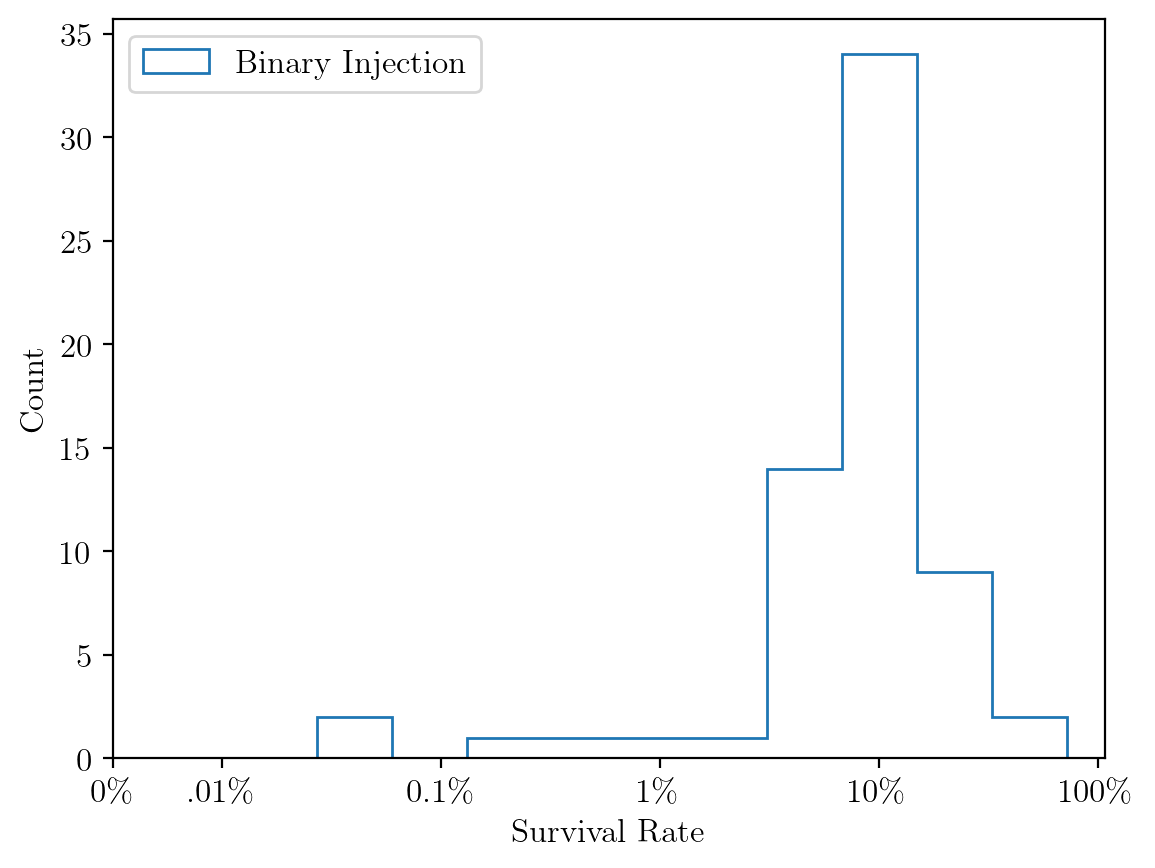

In [50]:
single_inj_hist = np.array(single_inj)
single_inj_hist[single_inj_hist < 1e-4] = 10**(-4.5)

no_inj_hist = np.array(no_inj)
no_inj_hist[no_inj_hist < 1e-4] = 10**(-4.5)

binary_inj_hist = np.array(binary_inj)
binary_inj_hist[binary_inj_hist < 1e-4] = 10**(-4.5)

plt.hist([np.log10(binary_inj_hist/single_inj_hist)], histtype="step", label=["Binary Injection"])
xticks = [[-3.5, r"<10$^3"]]
plt.xticks([-4.5, -4, -3, -2, -1, 0], [r"~0\%", r".01\%", r"0.1\%", r"1\%", r"10\%", r"100\%"])
plt.legend(loc=2)
plt.xlabel("Survival Rate")
plt.ylabel("Count")
plt.savefig("../figs/survival_hist.png", transparent=True)

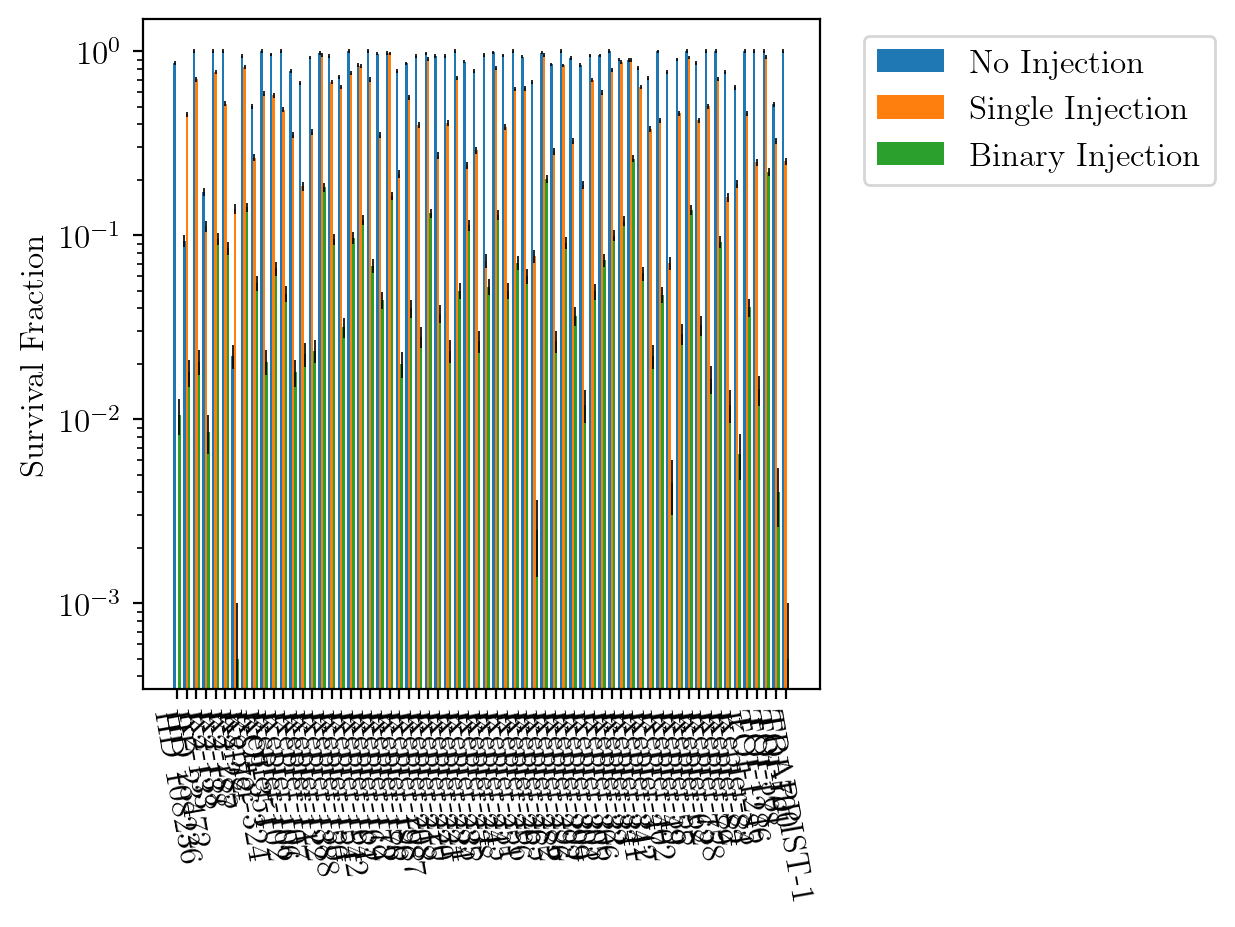

In [22]:
no_dir = dirs[0]
single_dir = dirs[1]
binary_dir = dirs[2]

cutoff = 0
no_inj = np.array([results[no_dir][system]["survival_frac"] for system in systems])
single_inj = np.array([results[single_dir][system]["survival_frac"] for system in systems])
binary_inj = np.array([results[binary_dir][system]["survival_frac"] for system in systems])


no_inj_err = np.array([np.sqrt(results[no_dir][system]["n_survived"])/(float(results[no_dir][system]["n_act"])) for system in systems])
single_inj_err = np.array([np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems])
binary_inj_err = np.array([np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems])

mask = binary_inj > 0
systems=np.array(systems)
width = 0.25
# width = 0.7
xs = np.arange(len(no_inj[mask]))
plt.plot(figsize=(30,10))
plt.bar(xs, no_inj[mask], width=width, label="No Injection")
plt.errorbar(xs, no_inj[mask], no_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+width, single_inj[mask], width=width, label="Single Injection")
plt.errorbar(xs+width, single_inj[mask], single_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+2*width, binary_inj[mask], width=width, label="Binary Injection")
plt.errorbar(xs+2*width, binary_inj[mask], binary_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.xticks(xs+width, systems[mask], rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.tight_layout()
# plt.savefig("../figs/survival_frac2.png", transparent=True)
plt.show()

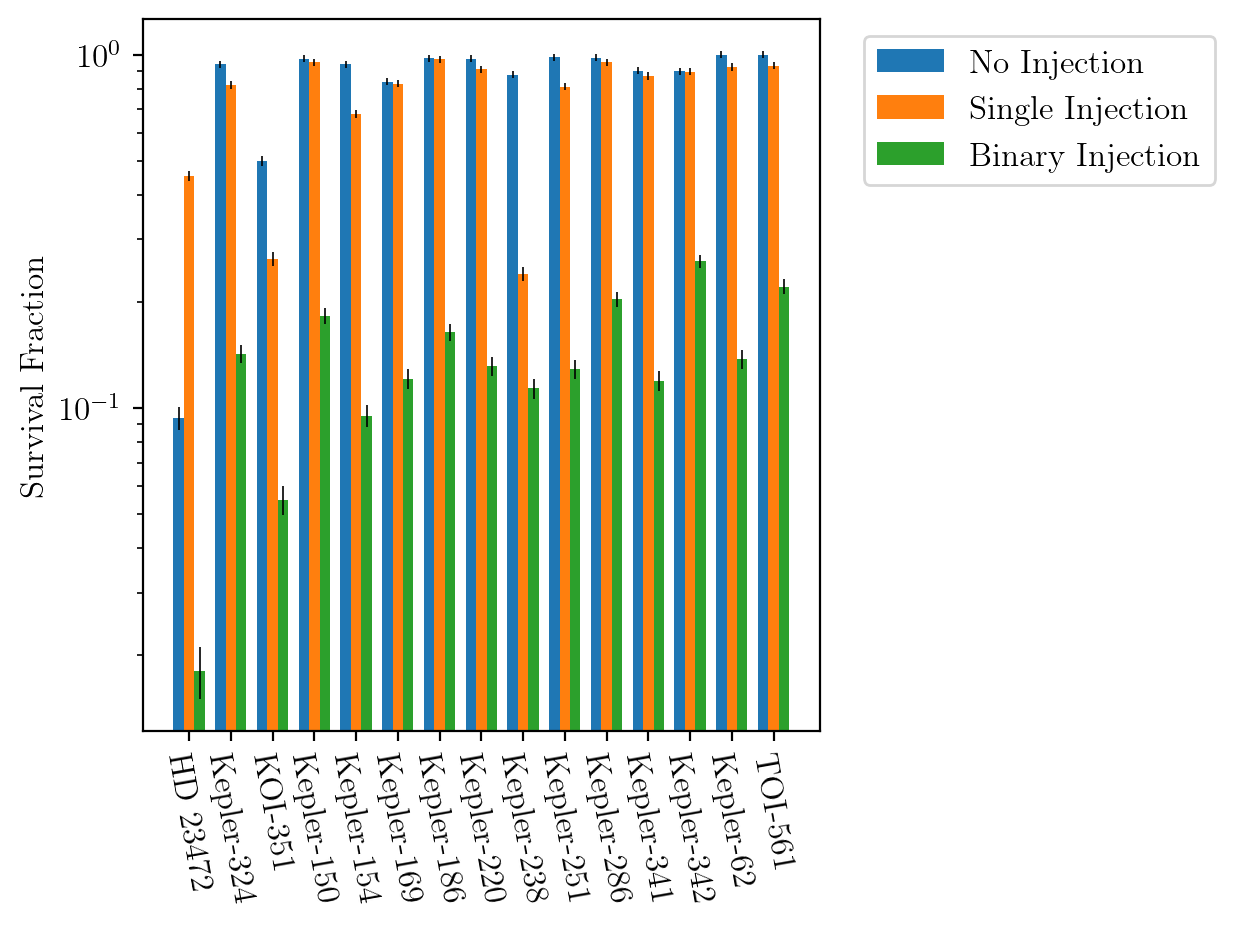

In [23]:
no_dir = dirs[0]
single_dir = dirs[1]
binary_dir = dirs[2]

cutoff = 0
no_inj = np.array([results[no_dir][system]["survival_frac"] for system in systems])
single_inj = np.array([results[single_dir][system]["survival_frac"] for system in systems])
binary_inj = np.array([results[binary_dir][system]["survival_frac"] for system in systems])


no_inj_err = np.array([np.sqrt(results[no_dir][system]["n_survived"])/(float(results[no_dir][system]["n_act"])) for system in systems])
single_inj_err = np.array([np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems])
binary_inj_err = np.array([np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems])

mask = ((single_inj/no_inj > .5) + binary_inj/no_inj > 1e-1) * no_inj > 10**(-2.5)

mask = binary_inj/no_inj > 1e-1


systems=np.array(systems)
width = 0.25
# width = 0.7
xs = np.arange(len(no_inj[mask]))
plt.plot(figsize=(30,10))
plt.bar(xs, no_inj[mask], width=width, label="No Injection")
plt.errorbar(xs, no_inj[mask], no_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+width, single_inj[mask], width=width, label="Single Injection")
plt.errorbar(xs+width, single_inj[mask], single_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+2*width, binary_inj[mask], width=width, label="Binary Injection")
plt.errorbar(xs+2*width, binary_inj[mask], binary_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.xticks(xs+width, systems[mask], rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.tight_layout()
plt.savefig("../figs/survival_frac3.png", transparent=True)
plt.show()

In [ ]:
bina

In [14]:
def error_prop_div(A, B, A_err, B_err):
    return A/B * np.sqrt(A_err**2/A**2 + B_err**2/B**2)

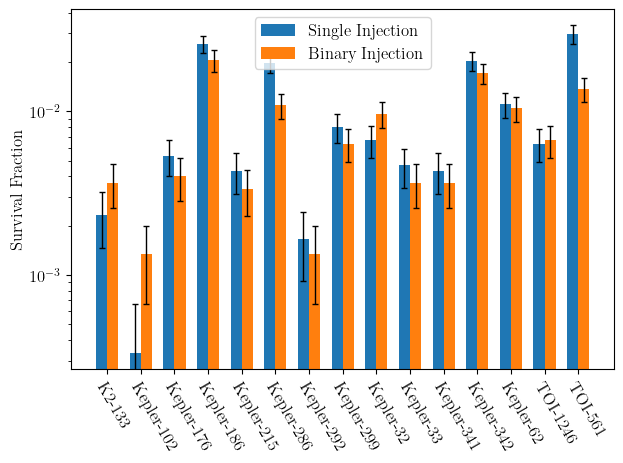

In [58]:
# no_dir = dirs[0]
# single_dir = dirs[1]
# binary_dir = dirs[2]

cutoff = 0
# no_inj = np.array([results[no_dir][system]["survival_frac"] for system in systems])
# no_inj = np.array([1 for system in systems if system != "Kepler-324"])

single_inj = np.array(single_inj)
binary_inj = np.array(binary_inj)
# single_inj = np.array([results[single_dir][system]["survival_frac"] for system in systems])
# binary_inj = np.array([results[binary_dir][system]["survival_frac"] for system in systems])


# single_inj_err = np.array([error_prop_div(results[single_dir][system]["n_survived"] / results[single_dir][system]["n_act"],
#                                             results[no_dir][system]["n_survived"]/ results[no_dir][system]["n_act"],
#                                             np.sqrt(results[single_dir][system]["n_survived"]) / results[single_dir][system]["n_act"],
#                                             np.sqrt(results[no_dir][system]["n_survived"])/ results[no_dir][system]["n_act"]
#                                            ) for system in systems if system != "Kepler-324"])

# binary_inj_err = np.array([error_prop_div(results[binary_dir][system]["n_survived"] / results[binary_dir][system]["n_act"],
#                                             results[no_dir][system]["n_survived"]/ results[no_dir][system]["n_act"],
#                                             np.sqrt(results[binary_dir][system]["n_survived"]) / results[binary_dir][system]["n_act"],
#                                             np.sqrt(results[no_dir][system]["n_survived"])/ results[no_dir][system]["n_act"]
#                                            ) for system in systems if system != "Kepler-324"])

single_inj_error = np.array([np.sqrt(results[single_dir][system]["n_survived"]) 
                             / results[single_dir][system]["n_act"] 
                             for system in systems if system != "Kepler-324"])

binary_inj_error = np.array([np.sqrt(results[binary_dir][system]["n_survived"]) 
                             / results[binary_dir][system]["n_act"] 
                             for system in systems if system != "Kepler-324"])


mask = ((binary_inj/(single_inj+1e-20) > .75) * ((single_inj > 1e-3) + (binary_inj > 1e-3))) + binary_inj > 0.01
# mask = binary_inj > .1

systems=np.array(systems)
width = 0.33
# width = 0.7
xs = np.arange(len(binary_inj[mask]))
plt.plot(figsize=(30,10))
# plt.bar(xs, no_inj[mask], width=width, label="No Injection")
# plt.errorbar(xs, no_inj[mask], no_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

# plt.bar(xs, single_inj[mask]/no_inj[mask], width=width, label="Single Injection")
plt.bar(xs, single_inj[mask], width=width, label="Single Injection")

# plt.errorbar(xs, single_inj[mask]/no_inj[mask], single_inj_err[mask], c="black", fmt=".", lw=1, markersize=0, capsize=2)
plt.errorbar(xs, single_inj[mask], single_inj_error[mask], c="black", fmt=".", lw=1, markersize=0, capsize=2)


plt.bar(xs+width, binary_inj[mask], width=width, label="Binary Injection")
# plt.bar(xs+width, binary_inj[mask]/no_inj[mask], width=width, label="Binary Injection")
# plt.errorbar(xs+width, binary_inj[mask]/no_inj[mask], binary_inj_err[mask], c="black", fmt=".", lw=1, markersize=0, capsize=2)
plt.errorbar(xs+width, binary_inj[mask], binary_inj_error[mask], c="black", fmt=".", lw=1, markersize=0, capsize=2)

plt.xticks(xs+width/2, systems[mask], rotation=(-60), ha="left", rotation_mode="anchor")
plt.ylabel("Survival Fraction")
# plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.legend()
plt.yscale("log")
plt.tight_layout()
plt.savefig("../figs/survival_frac.png", transparent=True, dpi=500)
plt.show()

In [21]:
mask = binary_inj > 0.01

np.sum(mask)

5

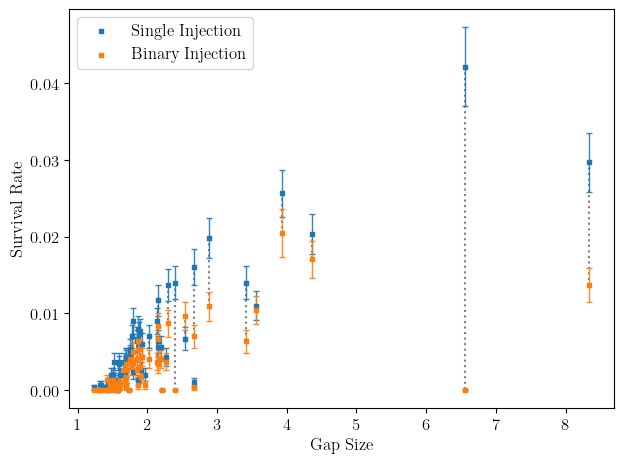

In [57]:
gaps = np.array([sys["gap"][1]/sys["gap"][0]  for sys in run_systems if sys["name"] != "Kepler-324"])



for i in range(len(single_inj)):
    plt.plot([gaps[i], gaps[i]], [single_inj[i], binary_inj[i]], "k:", alpha = 0.5)

plt.scatter(gaps, single_inj, marker="s", s=12, zorder=4, label="Single Injection")
plt.errorbar(gaps, single_inj, single_inj_err, zorder=3, c="tab:blue", fmt=".", lw=1, markersize=0, capsize=2, alpha=0.9)


plt.scatter(gaps, binary_inj, marker="s", s=12, zorder=4, label="Binary Injection")
plt.errorbar(gaps, binary_inj, binary_inj_err, zorder=3, c="tab:orange", fmt=".", lw=1, markersize=0, capsize=2, alpha=0.9)


plt.xlabel("Gap Size")
plt.ylabel("Survival Rate")
plt.legend()
plt.tight_layout()
plt.savefig("../figs/scatterplot.png", dpi=500)

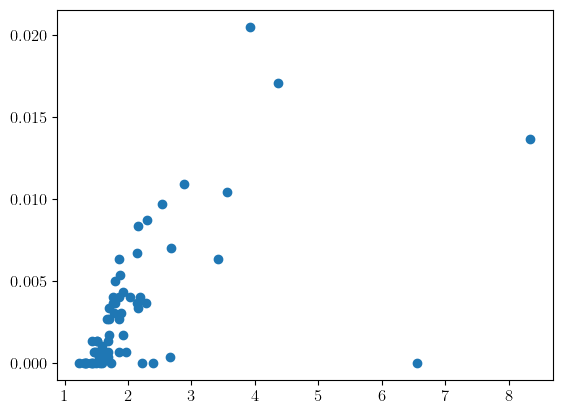

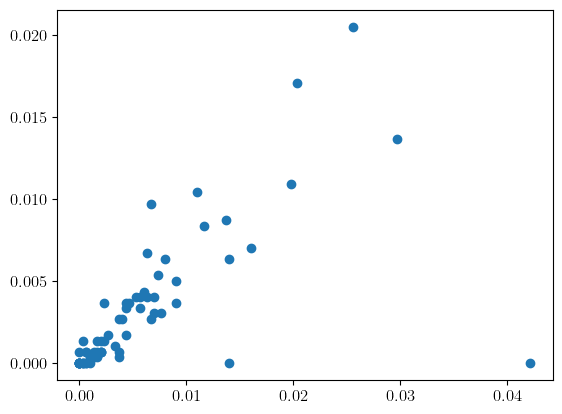

In [11]:
plt.scatter(single_inj, binary_inj)

In [120]:
single_inj_survival = (np.sum([results[single_dir][system]["n_survived"] for system in systems if system != "Kepler-324"]) 
                             / np.sum([results[single_dir][system]["n_act"] for system in systems if system != "Kepler-324"]))

binary_inj_survival = (np.sum([results[binary_dir][system]["n_survived"] for system in systems if system != "Kepler-324"]) 
                             / np.sum([results[binary_dir][system]["n_act"] for system in systems if system != "Kepler-324"]))


single_inj_survival, binary_inj_survival

(0.0055671537926235215, 0.0031977006252220624)

In [85]:
print(type(xs), xs.shape)
print(type(single_inj), single_inj.shape)
print(type(single_inj_err), single_inj_err.shape)
print(type(mask), mask.shape)

print(single_inj[mask].shape, single_inj_err[mask].shape)

<class 'numpy.ndarray'> (28,)
<class 'numpy.ndarray'> (65,)


AttributeError: 'list' object has no attribute 'shape'

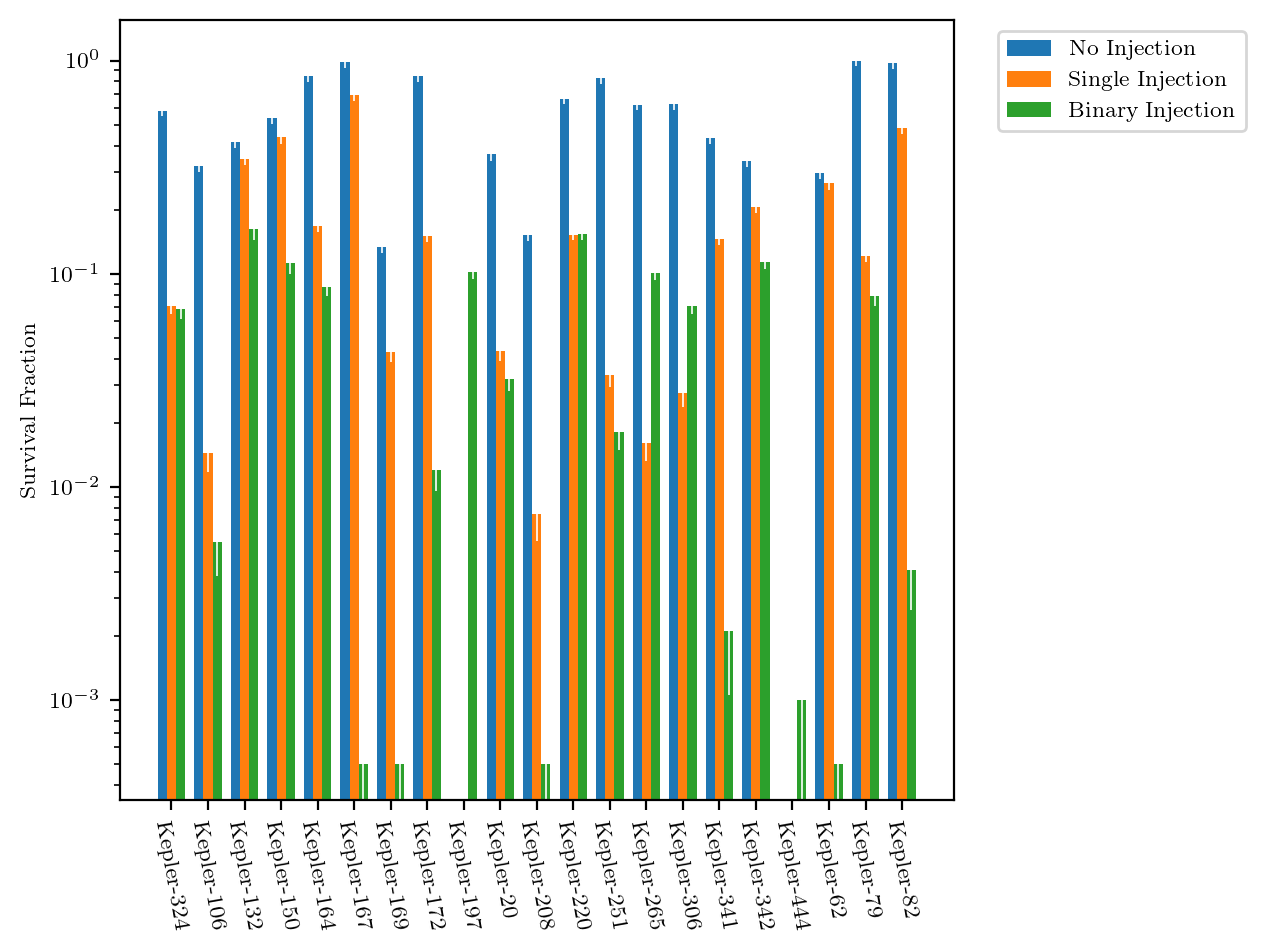

In [7]:
no_dir = dirs[0]
single_dir = dirs[1]
binary_dir = dirs[2]

cutoff = 0
no_inj = np.array([results[no_dir][system]["survival_frac"] for system in systems])
single_inj = np.array([results[single_dir][system]["survival_frac"] for system in systems])
binary_inj = np.array([results[binary_dir][system]["survival_frac"] for system in systems])


no_inj_err = np.array([np.sqrt(results[no_dir][system]["n_survived"])/(float(results[no_dir][system]["n_act"])) for system in systems])
single_inj_err = np.array([np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems])
binary_inj_err = np.array([np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems])

mask = binary_inj > 0
systems=np.array(systems)
width = 0.25
# width = 0.7
xs = np.arange(len(no_inj[mask]))
plt.plot(figsize=(30,10))
plt.bar(xs, no_inj[mask], width=width, label="No Injection")
plt.errorbar(xs, no_inj[mask], no_inj_err[mask], c="white", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+width, single_inj[mask], width=width, label="Single Injection")
plt.errorbar(xs+width, single_inj[mask], single_inj_err[mask], c="white", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+2*width, binary_inj[mask], width=width, label="Binary Injection")
plt.errorbar(xs+2*width, binary_inj[mask], binary_inj_err[mask], c="white", fmt=".", lw=0.6, markersize=0)

plt.xticks(xs+width, systems[mask], rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.tight_layout()
# plt.savefig("../figs/survival_frac2.png", transparent=True)
plt.show()

/tmp/ipykernel_1552471/2594451150.py:15: RuntimeWarning: invalid value encountered in divide
  mask = (single_inj/no_inj > .5) + binary_inj > 1e-2


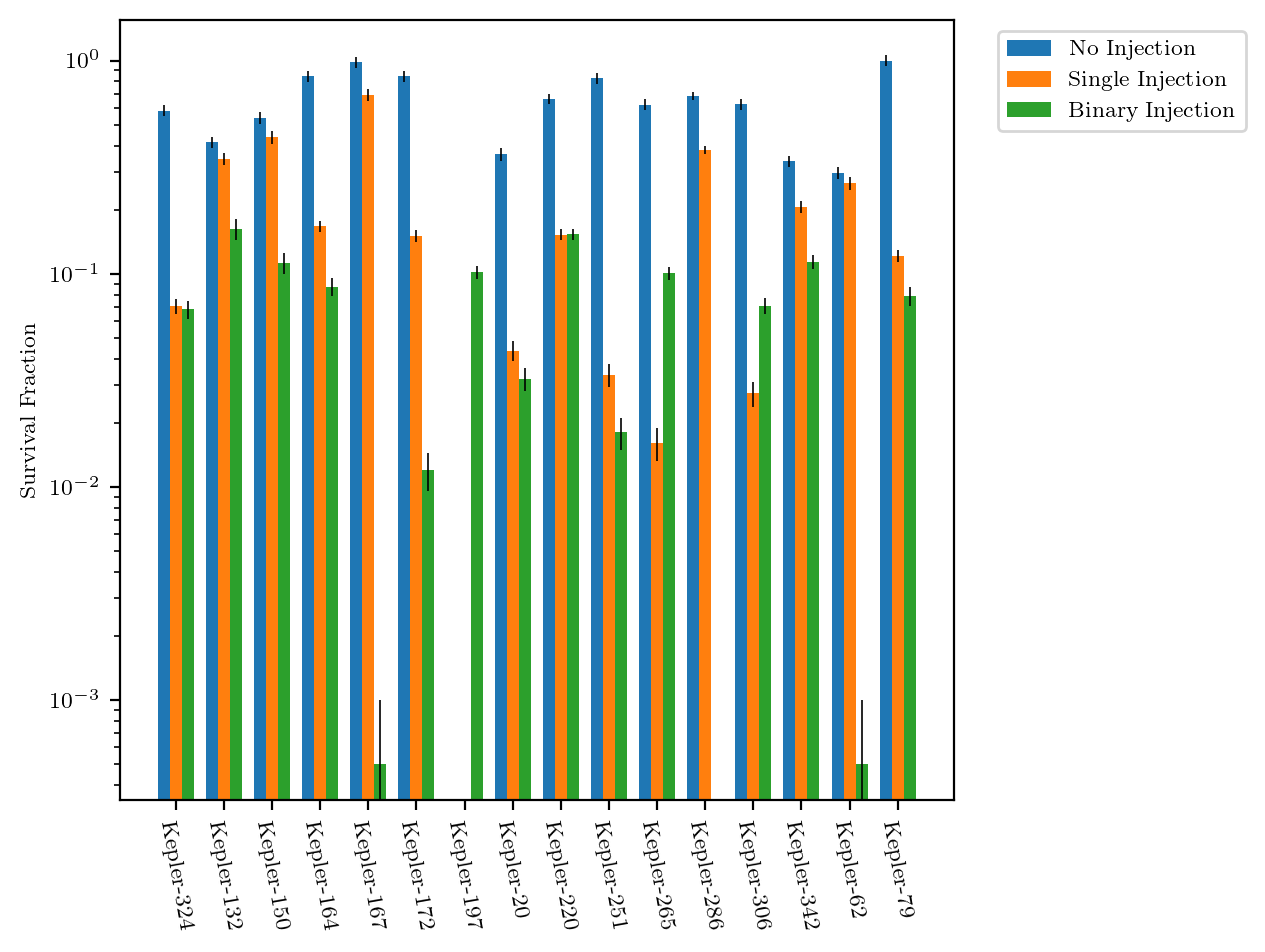

In [8]:
no_dir = dirs[0]
single_dir = dirs[1]
binary_dir = dirs[2]

cutoff = 0
no_inj = np.array([results[no_dir][system]["survival_frac"] for system in systems])
single_inj = np.array([results[single_dir][system]["survival_frac"] for system in systems])
binary_inj = np.array([results[binary_dir][system]["survival_frac"] for system in systems])


no_inj_err = np.array([np.sqrt(results[no_dir][system]["n_survived"])/(float(results[no_dir][system]["n_act"])) for system in systems])
single_inj_err = np.array([np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems])
binary_inj_err = np.array([np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems])

mask = (single_inj/no_inj > .5) + binary_inj > 1e-2
systems=np.array(systems)
width = 0.25
# width = 0.7
xs = np.arange(len(no_inj[mask]))
plt.plot(figsize=(30,10))
plt.bar(xs, no_inj[mask], width=width, label="No Injection")
plt.errorbar(xs, no_inj[mask], no_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+width, single_inj[mask], width=width, label="Single Injection")
plt.errorbar(xs+width, single_inj[mask], single_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+2*width, binary_inj[mask], width=width, label="Binary Injection")
plt.errorbar(xs+2*width, binary_inj[mask], binary_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.xticks(xs+width, systems[mask], rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.tight_layout()
# plt.savefig("../figs/survival_frac3.png", transparent=True)
plt.show()

/tmp/ipykernel_1552471/4229902233.py:15: RuntimeWarning: invalid value encountered in divide
  mask = (single_inj/no_inj > .5) + binary_inj > 1e-2
/tmp/ipykernel_1552471/4229902233.py:24: RuntimeWarning: invalid value encountered in divide
  plt.bar(xs, single_inj[mask]/no_inj[mask], width=width, label="Single Injection")
/tmp/ipykernel_1552471/4229902233.py:25: RuntimeWarning: invalid value encountered in divide
  plt.errorbar(xs, single_inj[mask]/no_inj[mask], single_inj_err[mask]/no_inj[mask], c="black", fmt=".", lw=0.6, markersize=0)
/tmp/ipykernel_1552471/4229902233.py:27: RuntimeWarning: divide by zero encountered in divide
  plt.bar(xs+width, binary_inj[mask]/no_inj[mask], width=width, label="Binary Injection")
/tmp/ipykernel_1552471/4229902233.py:28: RuntimeWarning: divide by zero encountered in divide
  plt.errorbar(xs+width, binary_inj[mask]/no_inj[mask], binary_inj_err[mask]/no_inj[mask], c="black", fmt=".", lw=0.6, markersize=0)
/usr/licensed/anaconda3/2023.3/lib/python3.10

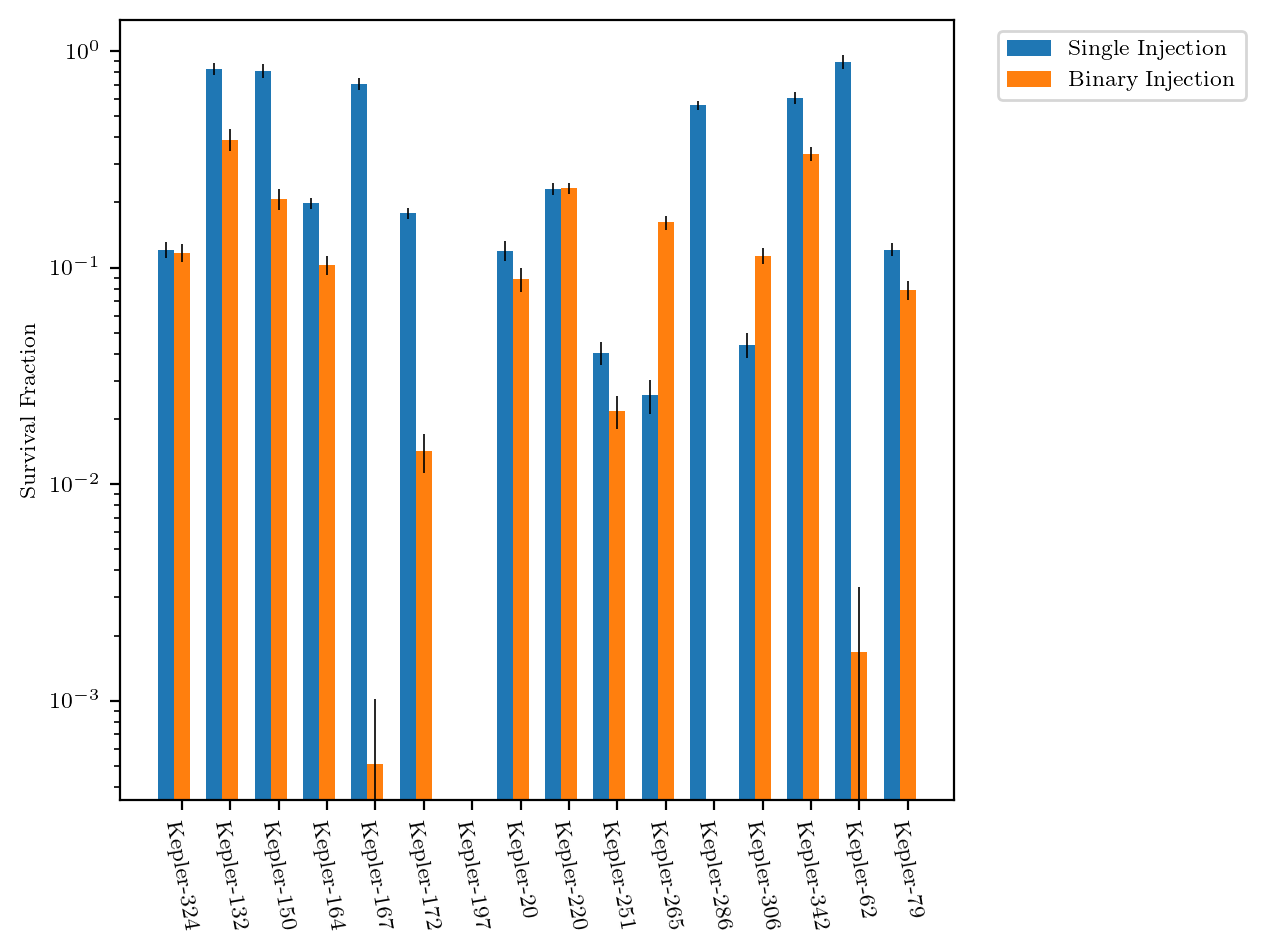

In [9]:
def quot_err(a, b, sigma_a, sigma_b, sigma_ab=0):
    return np.abs(a/b)*np.sqrt((sigma_a/a)**2 + (sigma_b/b)**2 -2*sigma_ab/(a*b))


no_dir = dirs[0]
single_dir = dirs[1]
binary_dir = dirs[2]

cutoff = 0
no_inj = np.array([results[no_dir][system]["survival_frac"] for system in systems])
single_inj = np.array([results[single_dir][system]["survival_frac"] for system in systems])
binary_inj = np.array([results[binary_dir][system]["survival_frac"] for system in systems])


no_inj_err = np.array([np.sqrt(results[no_dir][system]["n_survived"])/(float(results[no_dir][system]["n_act"])) for system in systems])
single_inj_err = np.array([np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems])
binary_inj_err = np.array([np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems])

mask = (single_inj/no_inj > .5) + binary_inj > 1e-2
systems=np.array(systems)
width = 0.33
# width = 0.7
xs = np.arange(len(no_inj[mask]))
plt.plot(figsize=(30,10))
# plt.bar(xs, no_inj[mask], width=width, label="No Injection")
# plt.errorbar(xs, no_inj[mask], no_inj_err[mask], c="black", fmt=".", lw=0.6, markersize=0)


sin_err = quot_err(single_inj, no_inj, single_inj_err, no_inj_err)
bin_err = quot_err(binary_inj, no_inj, binary_inj_err, no_inj_err)


plt.bar(xs, single_inj[mask]/no_inj[mask], width=width, label="Single Injection")
plt.errorbar(xs, single_inj[mask]/no_inj[mask], sin_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.bar(xs+width, binary_inj[mask]/no_inj[mask], width=width, label="Binary Injection")
plt.errorbar(xs+width, binary_inj[mask]/no_inj[mask], binary_err[mask], c="black", fmt=".", lw=0.6, markersize=0)

plt.xticks(xs+width, systems[mask], rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.tight_layout()
plt.savefig("../figs/survival_frac4.png", transparent=True)
plt.show()

In [29]:
results["single_inj_large_sample"]["Kepler-220"]["n_survived"], results["single_inj_large_sample"]["Kepler-220"]["n_act"], results["single_inj_large_sample"]["Kepler-220"]["survival_frac"]

(44, 3232, 0.013613861386138614)

In [28]:
results["binary_inj"]["Kepler-220"]["n_survived"], results["binary_inj"]["Kepler-220"]["n_act"], results["binary_inj"]["Kepler-220"]["survival_frac"]

(124, 9997, 0.012403721116334901)

In [ ]:
results["binary_inj"]["Kepler-20"]["n_survived"]

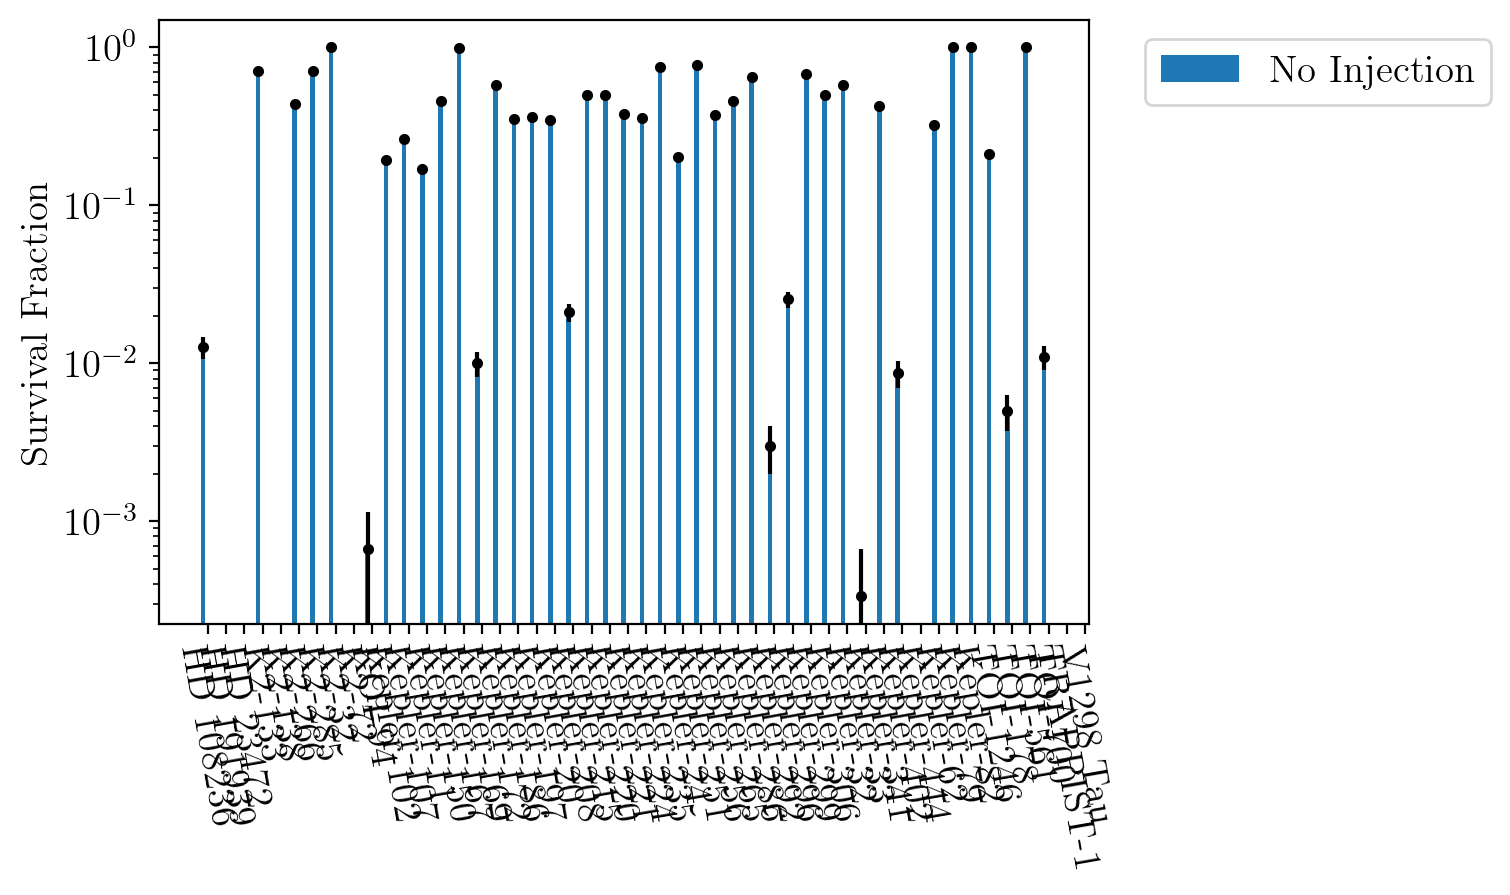

In [24]:
no_dir = dirs[0]
# single_dir = dirs[1]
# binary_dir = dirs[2]

no_inj = [results[no_dir][system]["survival_frac"] for system in systems]
# single_inj = [results[single_dir][system]["survival_frac"] for system in systems]
# binary_inj = [results[binary_dir][system]["survival_frac"] for system in systems]


no_inj_err = [np.sqrt(results[no_dir][system]["n_survived"])/results[no_dir][system]["n_act"] for system in systems]
# single_inj_err = [np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems]
# binary_inj_err = [np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems]

width = 0.25
xs = np.arange(len(no_inj))

plt.bar(xs, no_inj, width=width, label="No Injection")
plt.errorbar(xs, no_inj, no_inj_err, c="k", fmt=".")

# plt.bar(xs+width, single_inj, width=width, label="Single Injection")
# plt.errorbar(xs+width, single_inj, single_inj_err, c="k", fmt=".")

# plt.bar(xs+2*width, binary_inj, width=width, label="Binary Injection")
# plt.errorbar(xs+2*width, binary_inj, binary_inj_err, c="k", fmt=".")

plt.xticks(xs+width, systems, rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.savefig("../figs/survival_frac2.png")
plt.show()

In [3]:
no_dir = dirs[0]
single_dir = dirs[1]
binary_dir = dirs[2]

no_inj = [results[no_dir][system]["survival_frac"] for system in systems]
single_inj = [results[single_dir][system]["survival_frac"] for system in systems]
binary_inj = [results[binary_dir][system]["survival_frac"] for system in systems]


no_inj_err = [np.sqrt(results[no_dir][system]["n_survived"])/results[no_dir][system]["n_act"] for system in systems]
single_inj_err = [np.sqrt(results[single_dir][system]["n_survived"])/results[single_dir][system]["n_act"] for system in systems]
binary_inj_err = [np.sqrt(results[binary_dir][system]["n_survived"])/results[binary_dir][system]["n_act"] for system in systems]

OSError: [Errno 122] Disk quota exceeded: '../figs/survival_frac2.png'

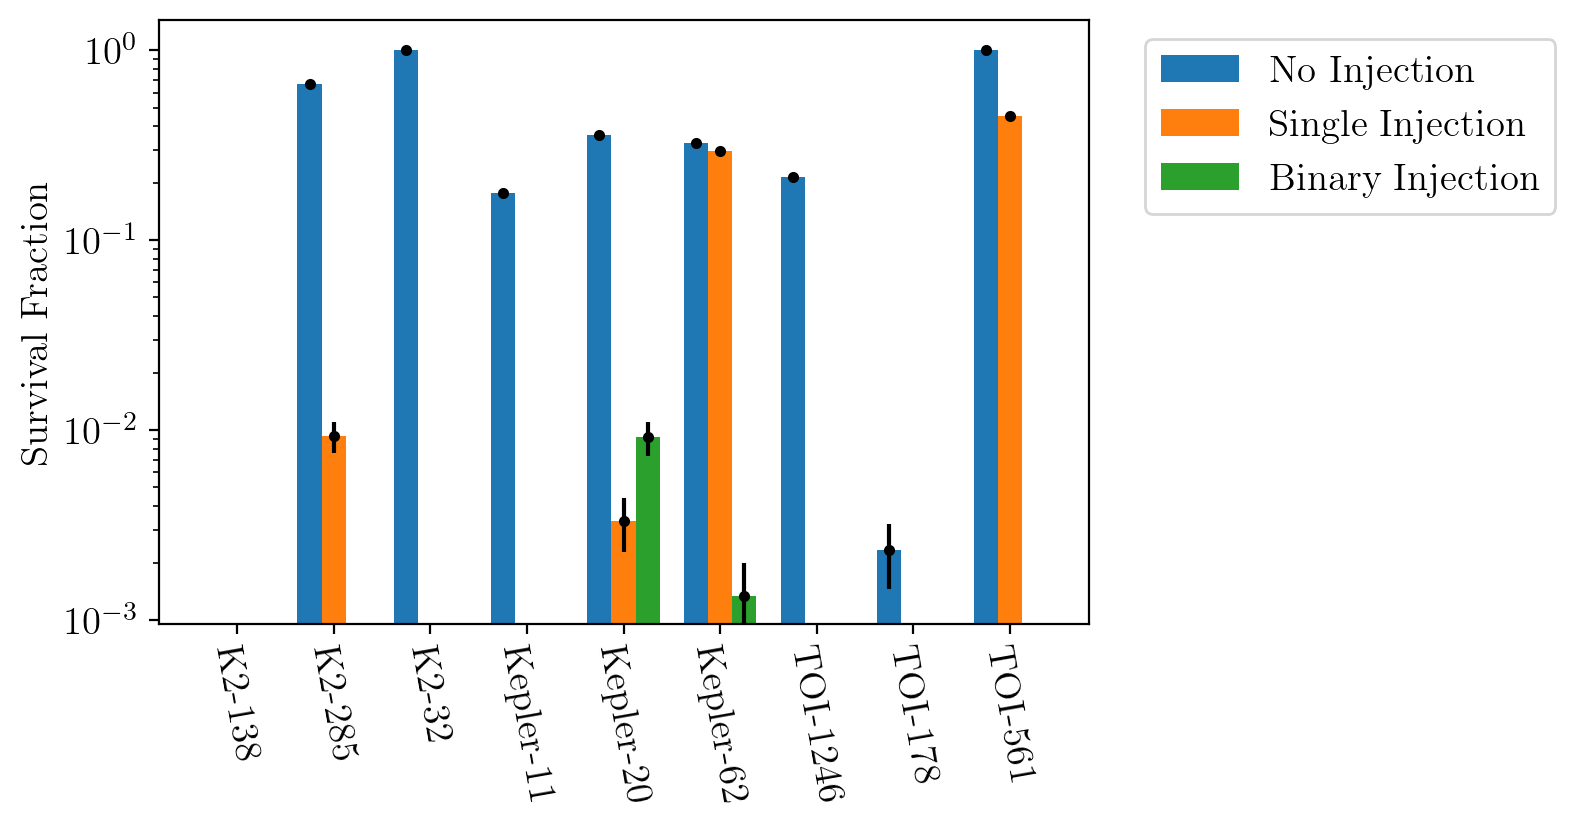

In [13]:
width = 0.25
xs = np.arange(len(no_inj))

plt.bar(xs, no_inj, width=width, label="No Injection")
plt.errorbar(xs, no_inj, no_inj_err, c="k", fmt=".")

plt.bar(xs+width, single_inj, width=width, label="Single Injection")
plt.errorbar(xs+width, single_inj, single_inj_err, c="k", fmt=".")

plt.bar(xs+2*width, binary_inj, width=width, label="Binary Injection")
plt.errorbar(xs+2*width, binary_inj, binary_inj_err, c="k", fmt=".")

plt.xticks(xs+width, systems, rotation=(-80))
plt.ylabel("Survival Fraction")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.savefig("../figs/survival_frac2.png")
plt.show()

/tmp/ipykernel_2533052/3261224704.py:7: RuntimeWarning: invalid value encountered in true_divide
  plt.bar(xs, single_inj/single_inj, width=width, label="Single Injection")
/tmp/ipykernel_2533052/3261224704.py:8: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(xs, single_inj/single_inj, single_inj_err/single_inj, c="k", fmt=".")
/tmp/ipykernel_2533052/3261224704.py:10: RuntimeWarning: invalid value encountered in true_divide
  plt.bar(xs+width, binary_inj/single_inj, width=width, label="Binary Injection")
/tmp/ipykernel_2533052/3261224704.py:11: RuntimeWarning: invalid value encountered in true_divide
  plt.errorbar(xs+width, binary_inj/single_inj, binary_inj_err/single_inj, c="k", fmt=".")


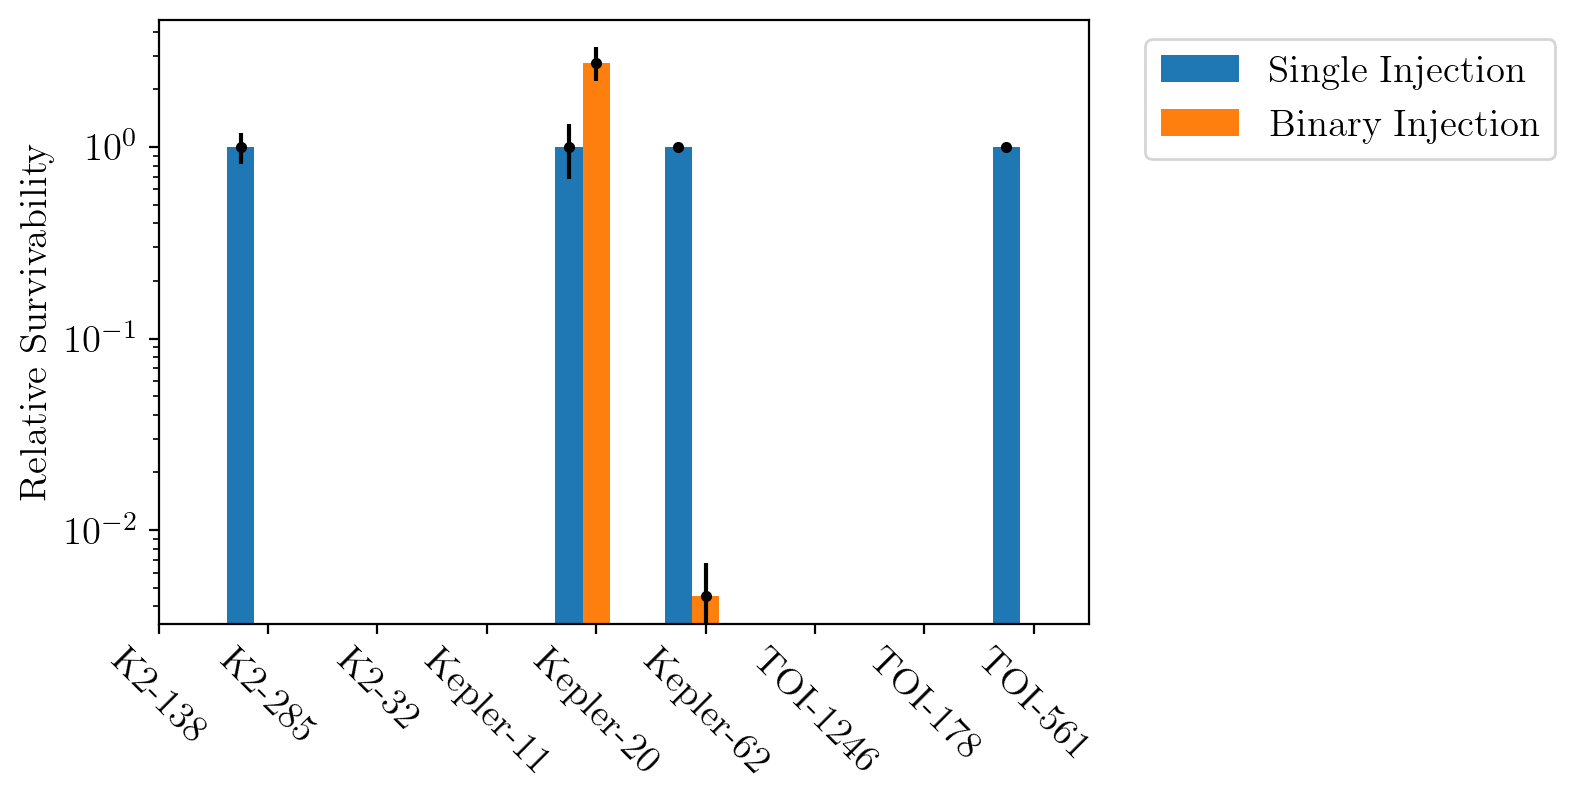

In [7]:
no_inj = np.array(no_inj)
binary_inj = np.array(binary_inj)
single_inj = np.array(single_inj)



plt.bar(xs, single_inj/single_inj, width=width, label="Single Injection")
plt.errorbar(xs, single_inj/single_inj, single_inj_err/single_inj, c="k", fmt=".")

plt.bar(xs+width, binary_inj/single_inj, width=width, label="Binary Injection")
plt.errorbar(xs+width, binary_inj/single_inj, binary_inj_err/single_inj, c="k", fmt=".")

plt.xticks(xs+width, systems, rotation=(-45))
plt.ylabel("Relative Survivability")
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.yscale("log")
plt.show()

K2-138
Number of samples in the populations:

0
survived
0
Writing to ../figs/pmar_best_compact_multi_K2-138.png...
K2-285
Number of samples in the populations:

0
survived
0
Writing to ../figs/pmar_best_compact_multi_K2-285.png...


/scratch/gpfs/wcukier/binary_planets/scripts/../tdpy/util.py:3785: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if strgextn is not '':
/scratch/gpfs/wcukier/binary_planets/scripts/../tdpy/util.py:3785: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if strgextn is not '':


OSError: [Errno 122] Disk quota exceeded: '../figs/pmar_best_compact_multi_K2-285.png'

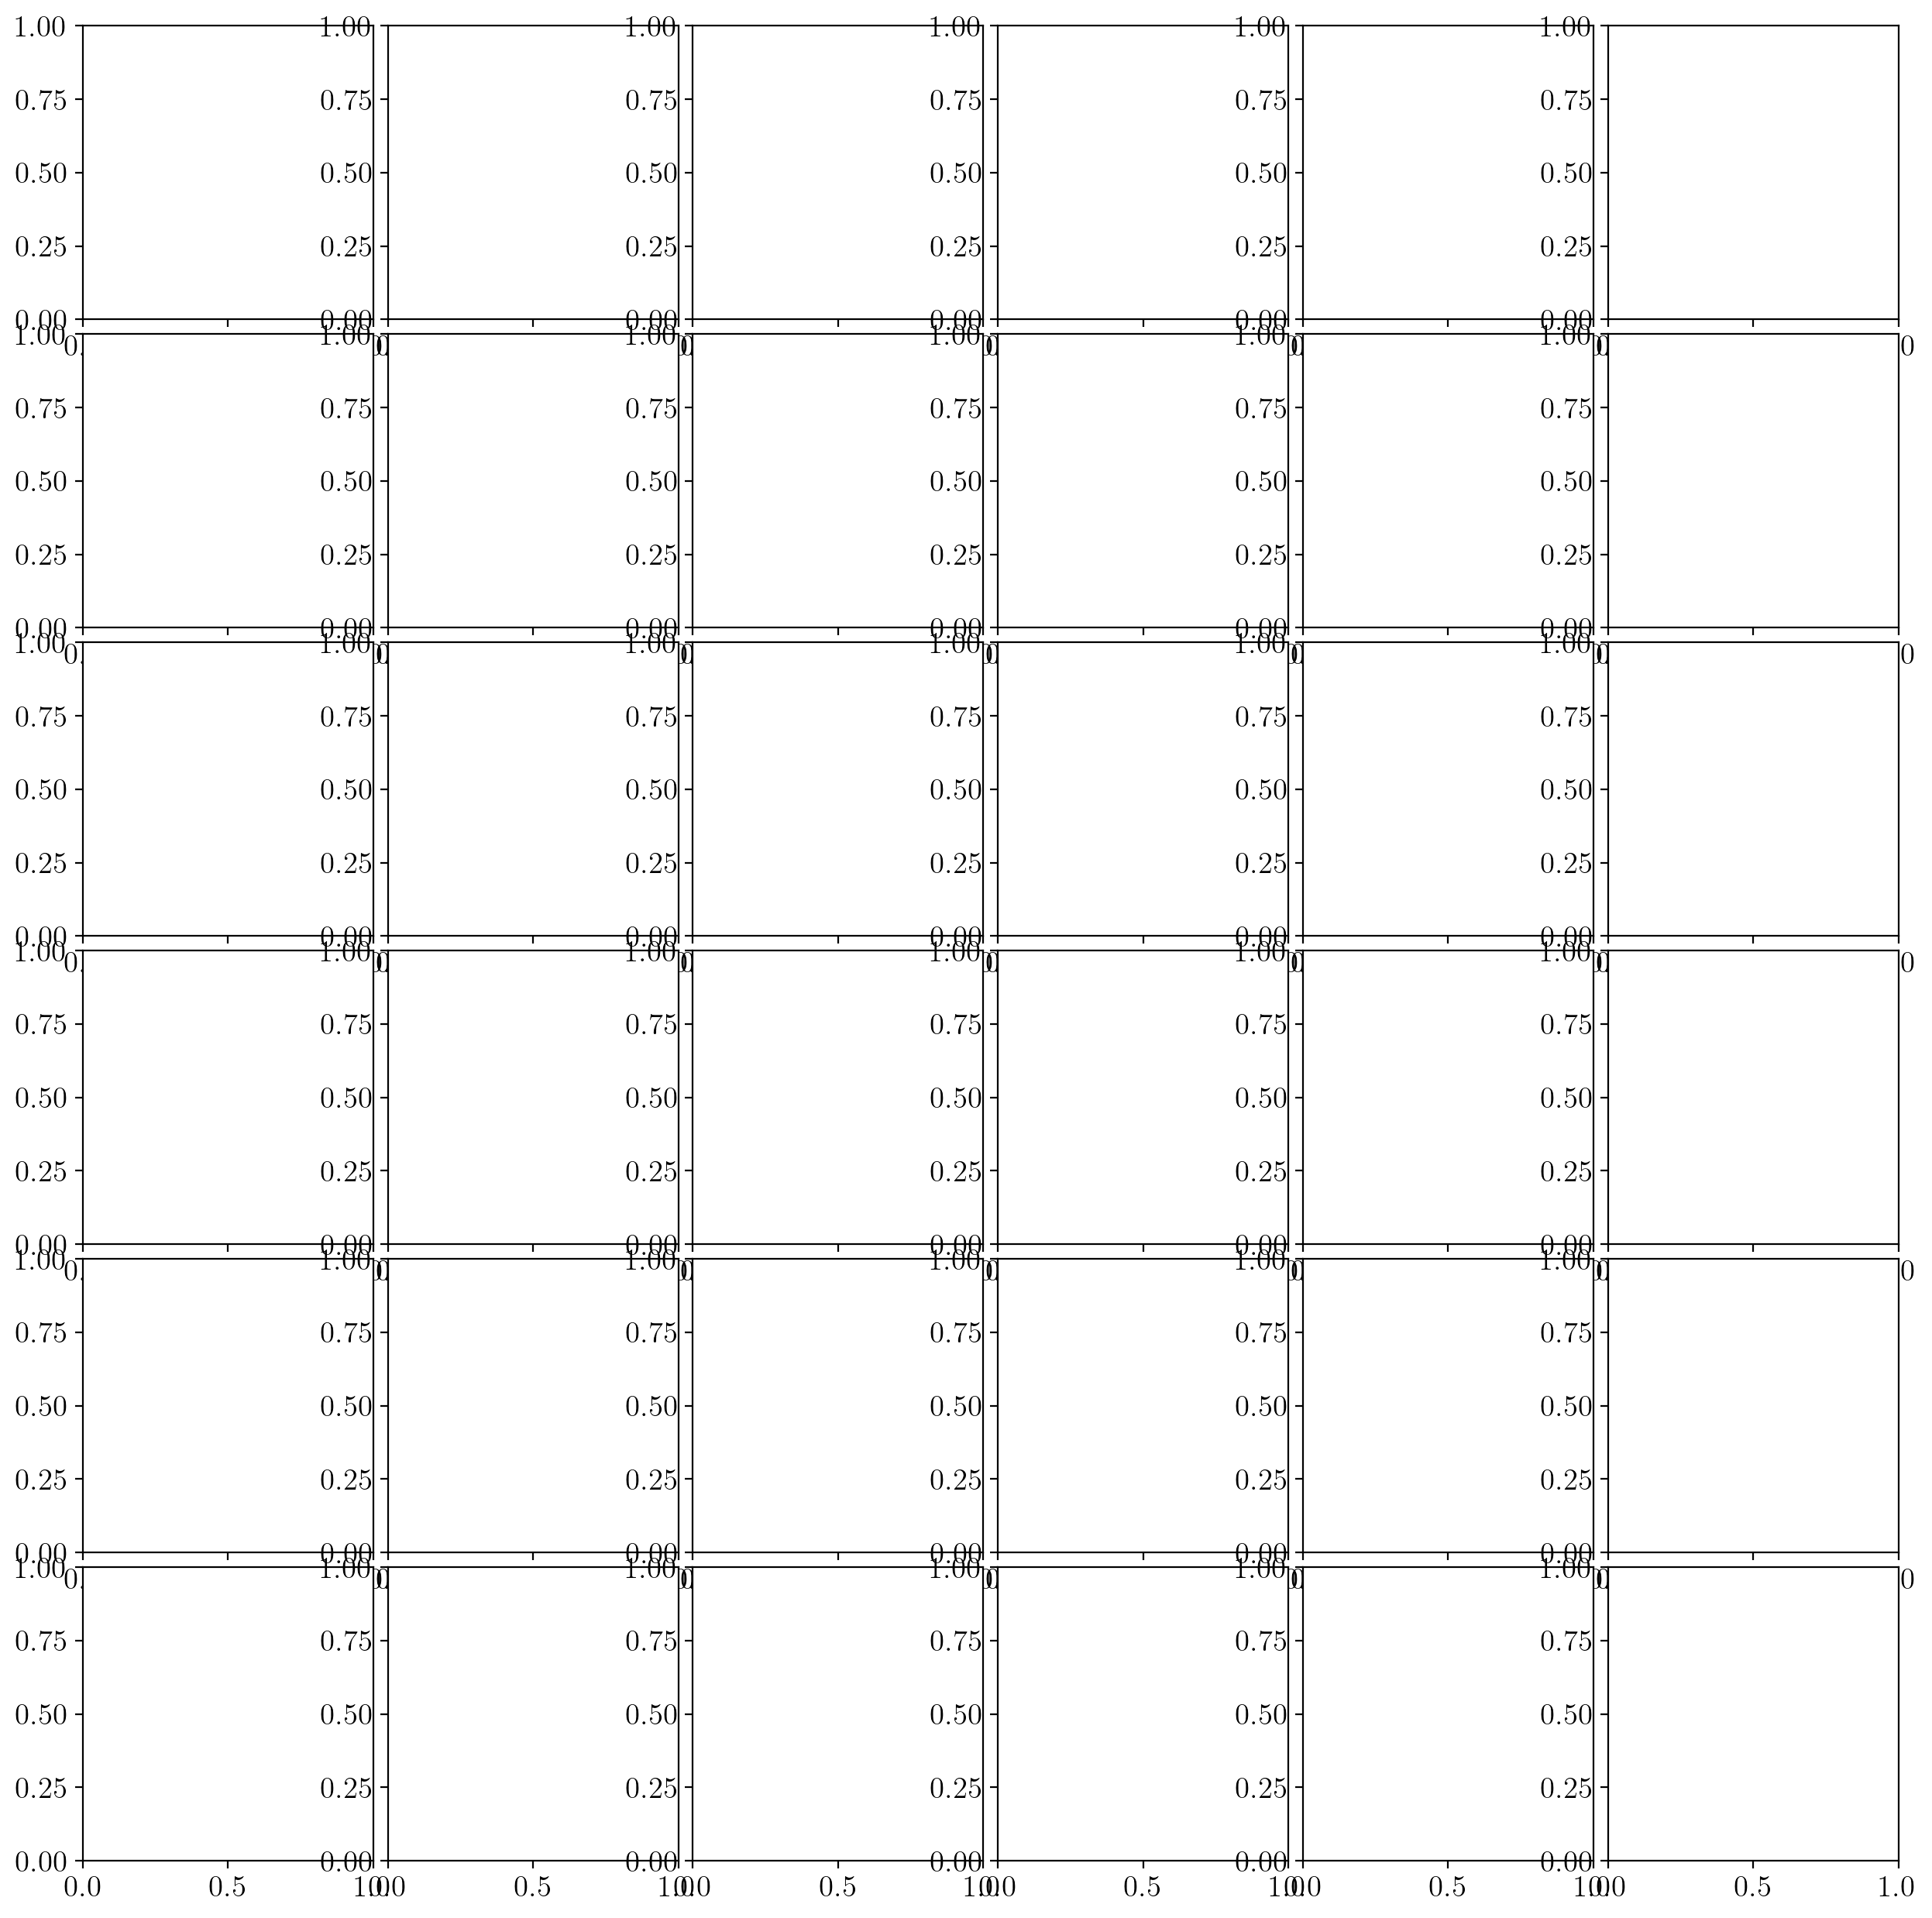

In [8]:
for sys in systems:
    print(sys)

    binary = results[dirs[2]][sys]
    # labels of the populations
    listlablpopl = [r'survived', r'']

    a_i, a_f =  binary["a_i"],  binary["a_f"]
    results[dir][system]["n_survived"] = np.sum(((a_i-a_f)/a_i)[:,1]<0.1)


    results[dir][system]["bin_m1"] = cfg["binary"]["m1"]
    results[dir][system]["bin_m2"] = cfg["binary"]["m2"]
    results[dir][system]["bin_esys"] = cfg["binary"]["e_sys"]
    results[dir][system]["bin_e"] = cfg["binary"]["e"]
    results[dir][system]["bin_d"] = cfg["binary"]["d"]
    results[dir][system]["bin_a"] = cfg["binary"]["a"]

    # number of populations
    numbpopl = len(listlablpopl)

    # number of samples for each population

    # number of features

    # generate samples
    mask =  ((a_i-a_f)/a_i)[:,1]<0.1
    listpara = []
    listpara.append(np.array([binary["bin_m1"][mask],binary["bin_m2"][mask], binary["bin_esys"][mask], binary["bin_e"][mask], binary["bin_d"][mask], binary["bin_a"][mask]]).T)
    # mask = (a_f>0)
    listpara.append(np.array([binary["bin_m1"][mask],binary["bin_m2"][mask], binary["bin_esys"][mask], binary["bin_e"][mask], binary["bin_d"][mask], binary["bin_a"][mask]]).T)
    # labels of the parameters
    listlablpara = [["m1", ''], ["m2", ''], ["esys", ""], ["e", ""], ["d", ""], ["a", ""]]


    tdpy.plot_grid(listpara, listlablpara, listlablpopl=listlablpopl, boolmakelegd=False, numbbinsplot=10, pathbase="../figs/", strgplot=f"compact_multi_{sys}")

In [11]:
sys

'TOI-1246'

In [28]:
binary["bin_m1"]

array(22.39623796)

In [31]:
compact_sys = np.load("../data/compact_systems_run.npy", allow_pickle=True)


In [32]:
sys_name = [sys["name"] for sys in compact_sys]
n_planets = np.zeros(len(systems))
mass = np.zeros(len(systems))
gap_size = np.zeros(len(systems))
gap_inner = np.zeros(len(systems))
gap_outer = np.zeros(len(systems))
mass_std = np.zeros(len(systems))
mass_constraint = np.zeros(len(systems))
e_avg = np.zeros(len(systems))
a_constraint = np.zeros(len(systems))

for i in range(len(systems)):
    j = np.where(np.array(sys_name)==systems[i])[0][0]
    n_planets[i] = len(compact_sys[j]["mass"])
    mass[i] = np.mean(compact_sys[j]["mass"])
    gap_size[i] = compact_sys[j]["gap"][1] - compact_sys[j]["gap"][0]
    gap_outer[i] = compact_sys[j]["gap"][1]
    gap_inner[i] = compact_sys[j]["gap"][0]
    mass_std[i] = np.std(compact_sys[j]["mass"])
    mass_constraint[i] = np.mean(np.array(compact_sys[j]["mass_upper"])-np.array(compact_sys[j]["mass_lower"]))
    e_avg[i] = np.mean(compact_sys[j]["e"])
    a_constraint[i] = np.mean(np.array((compact_sys[j]["a_upper"])-np.array(compact_sys[j]["a_lower"])/np.array(compact_sys[j]["a"])))


e_avg[np.isnan(e_avg)] = 0

In [11]:
binary_inj/single_inj

/tmp/ipykernel_2533052/1707224897.py:1: RuntimeWarning: invalid value encountered in true_divide
  binary_inj/single_inj


array([       nan, 0.        ,        nan,        nan, 2.7584621 ,
       0.00450281,        nan,        nan, 0.        ])

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


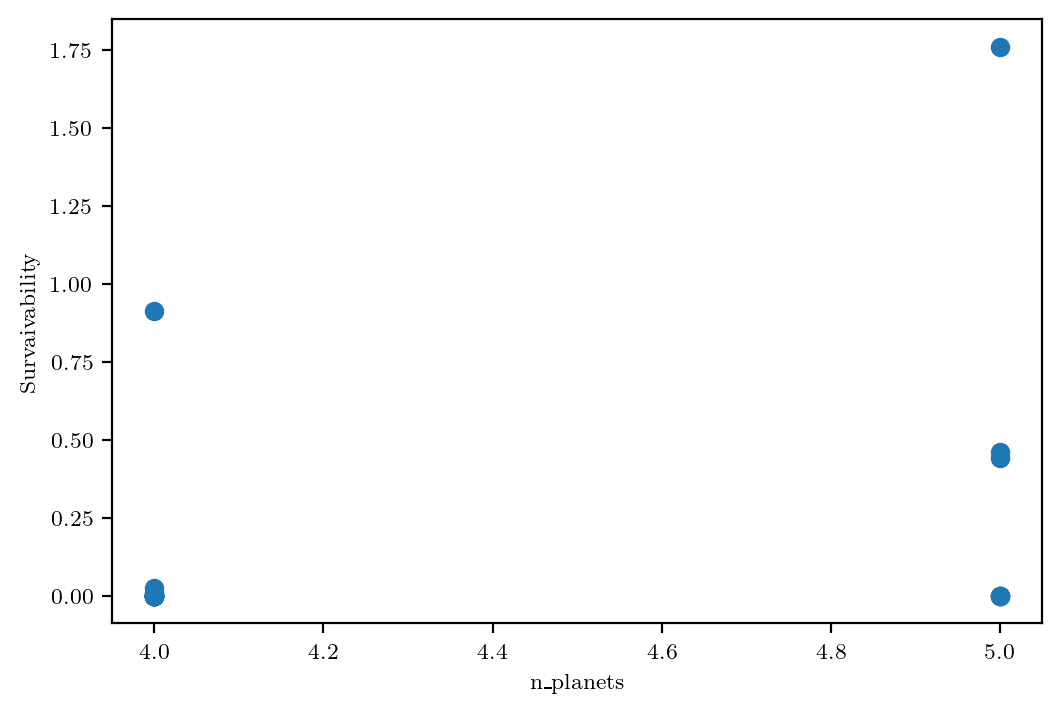

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


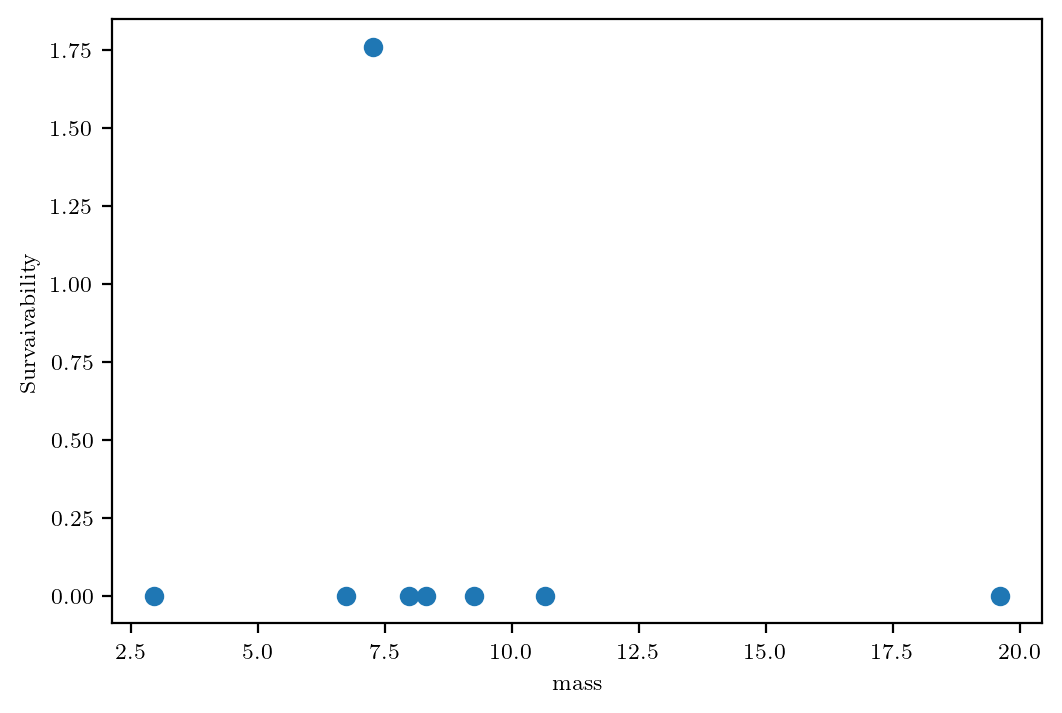

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


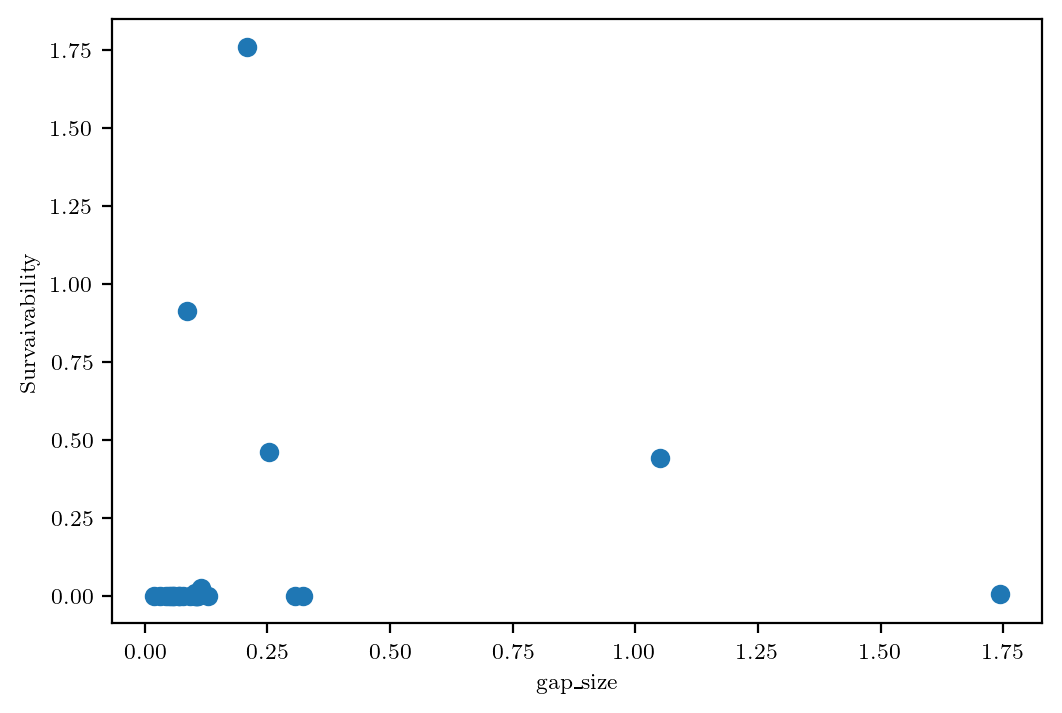

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


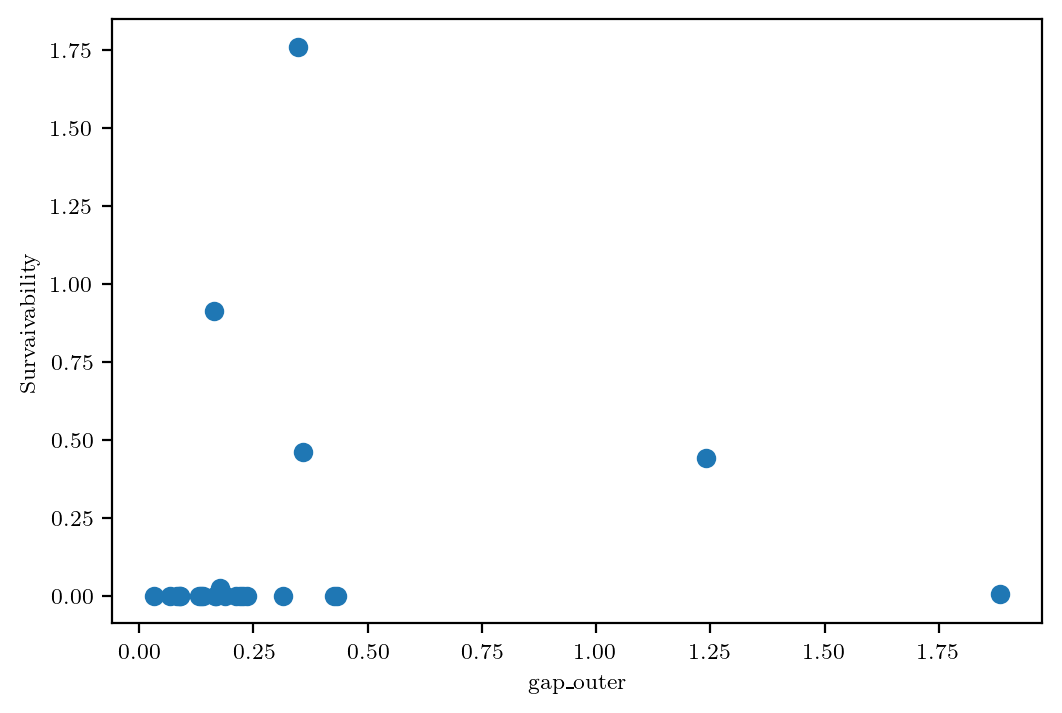

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


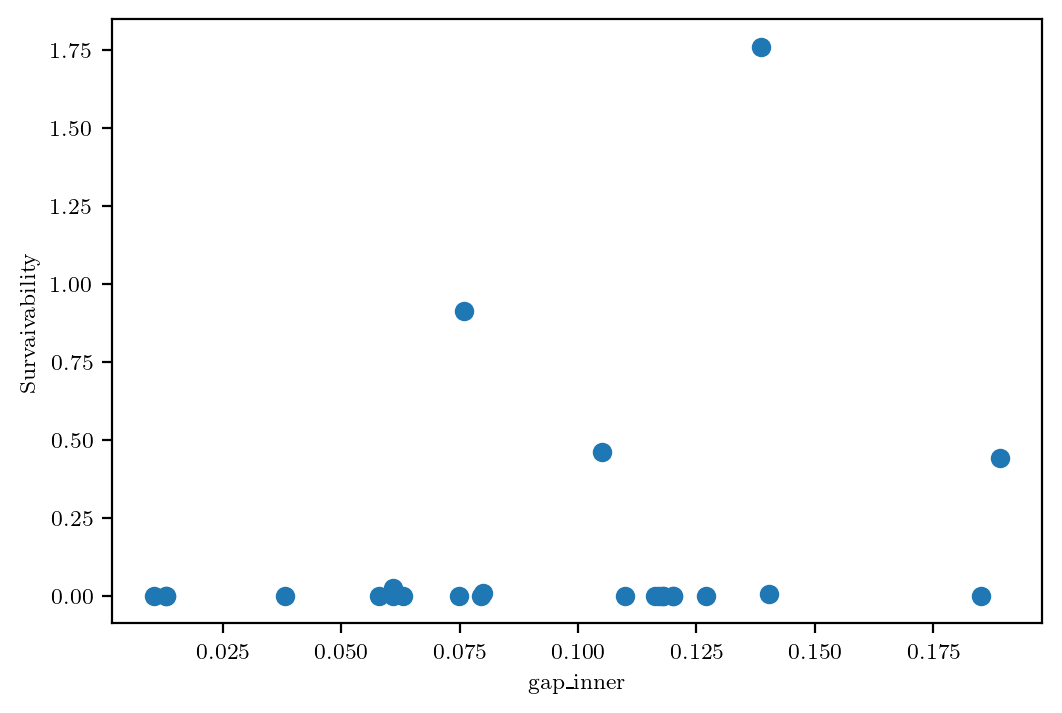

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


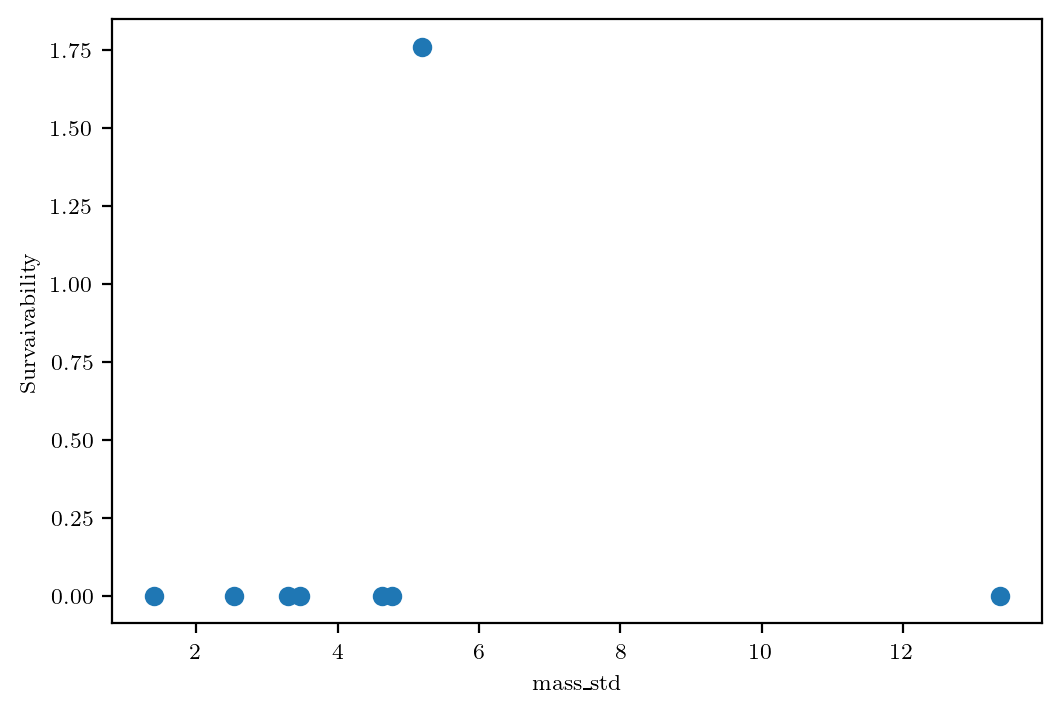

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


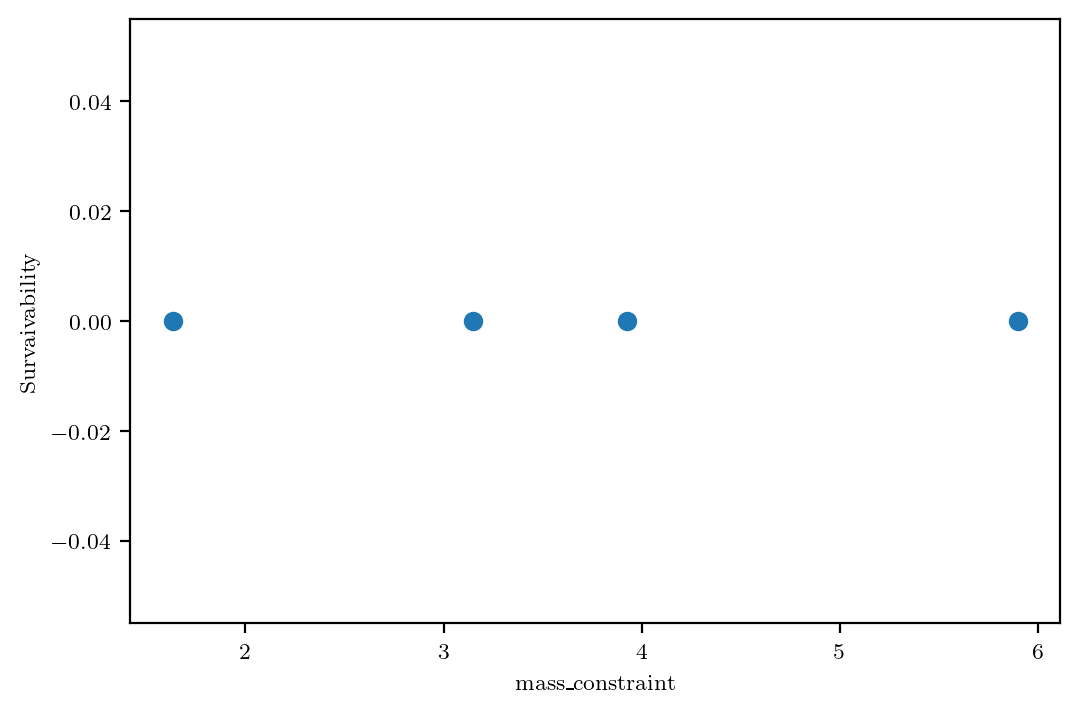

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


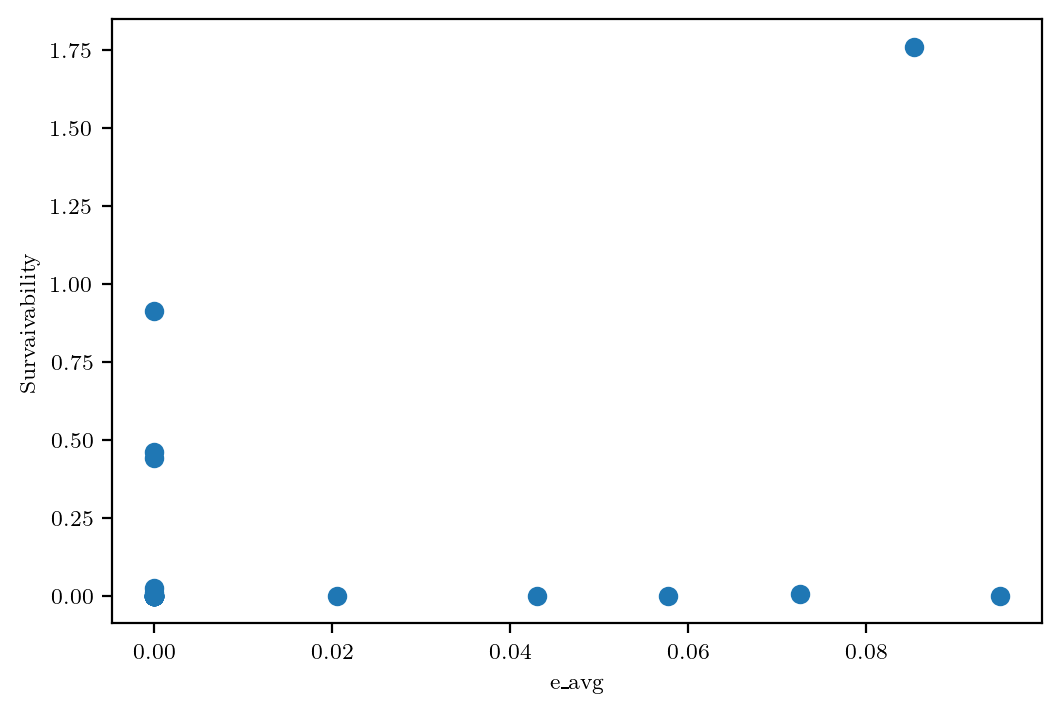

/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: divide by zero encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)
/tmp/ipykernel_934370/1242029705.py:5: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(vars[i], binary_inj/single_inj)


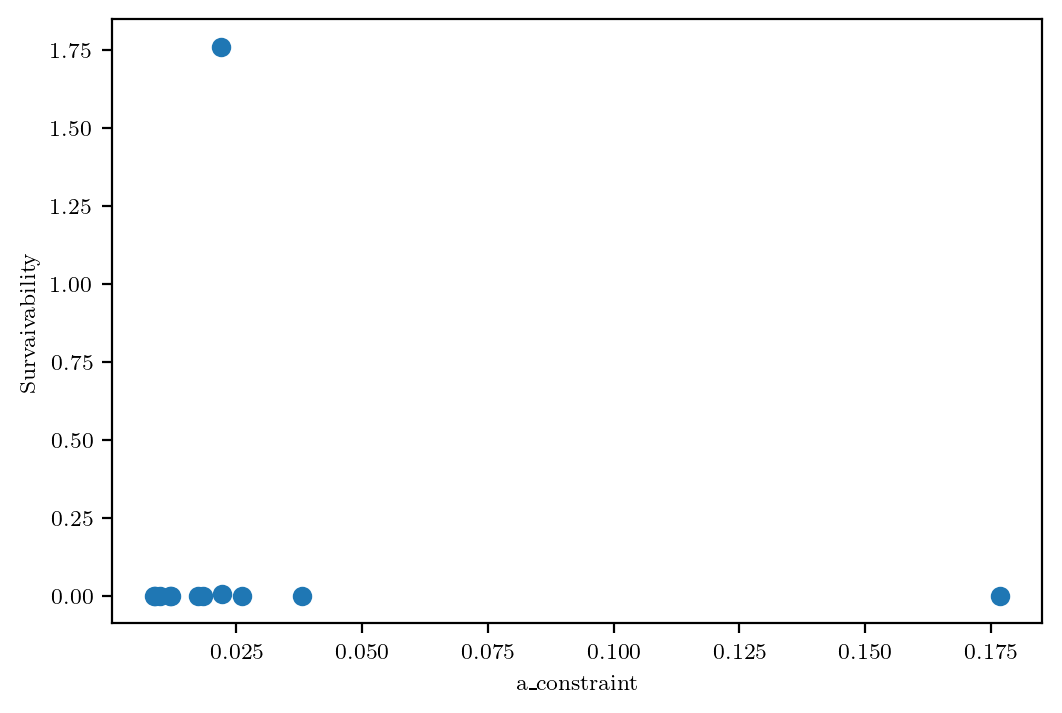

In [33]:
vars = [n_planets, mass, gap_size, gap_outer, gap_inner, mass_std, mass_constraint, e_avg, a_constraint]
labels = ["n_planets", "mass", "gap_size", "gap_outer", "gap_inner", "mass_std", "mass_constraint", "e_avg", "a_constraint"]

for i in range(len(vars)):
    plt.scatter(vars[i], binary_inj/single_inj)
    plt.ylabel("Survaivability")
    plt.xlabel(labels[i])
    plt.show()

In [24]:
compact_sys[0]

{'name': 'K2-138',
 'st_mass': 0.94,
 'st_upper': 0.02,
 'st_lower': -0.02,
 'st_lim': 0.0,
 'st_ref': '<a refstr=LOPEZ_ET_AL__2019 href=https://ui.adsabs.harvard.edu/abs/2019A&A...631A..90L/abstract target=ref>Lopez et al. 2019</a>',
 'mass': array([ 3.1 ,  6.31,  7.92, 12.97,  1.63,  4.32]),
 'mass_upper': [1.05, 1.13, 1.39, 1.98, 2.12, 5.26],
 'mass_lower': [-1.05, -1.23, -1.35, -1.99, -1.18, -3.03],
 'mass_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'r': [1.51, 2.299, 2.39, 3.39, 2.904, 3.013],
 'r_upper': [0.11, 0.12, 0.104, 0.156, 0.164, 0.303],
 'r_lower': [-0.084, -0.087, -0.084, -0.11, -0.111, -0.251],
 'r_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'e': array([0.048, 0.045, 0.043, 0.077, 0.062, 0.059]),
 'e_upper': [0.054, 0.051, 0.041, 0.048, 0.064, 0.063],
 'e_lower': [-0.033, -0.032, -0.03, -0.049, -0.043, -0.04],
 'e_lim': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 'a': array([0.03385, 0.04461, 0.05893, 0.0782 , 0.10447, 0.23109]),
 'a_upper': [0.00023, 0.0003, 0.0004, 0.00053, 0.0007, 0.001

False

(array([1]),)

In [15]:
results["no_inj"][ "Kepler-62"]["a_i"]

array([[0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.11799088, 0.43018971, 0.72183625],
       [0.05523045, 0.09390073, 0.

In [6]:
n = 1000

dirs = ["no_inj"]
systems = ["K2-32", "K2-138", "Kepler-62", "TOI-178", "TOI-1246"]

results = {}
    

for dir in dirs:
    results[dir] = {}
    for system in systems:
        results[dir][system] = {}

        n_act = 0

        for i in tqdm(range(1, n)):
            try:
                summary = np.load(f"../output/{dir}/{system}/{i}/summary.npy")
                with open(f"../output/{dir}/{system}/{i}/config.json") as f:
                    config = json.load(f)
                elements = np.load(f"../output/{dir}/{system}/{i}/elements.npy")
                if i==1:
                    results[dir][system]["a_i"] = elements[0,:,0]
                    results[dir][system]["a_f"] = elements[-1,:,0]
                else:
                    results[dir][system]["a_i"] = np.vstack(
                        (results[dir][system]["a_i"], elements[0,:,0]))
                    results[dir][system]["a_f"] = np.vstack(
                        (results[dir][system]["a_f"], elements[-1,:,0]))

                n_act += 1
            except Exception as e:
                # print(e)
                pass
        print(system)
        a_i, a_f =  results[dir][system]["a_i"],  results[dir][system]["a_f"]
        
        results[dir][system]["n_survived"] = np.sum(((a_i-a_f)/a_i)[:,1]<0.1)
        results[dir][system]["n_act"] = n_act
        results[dir][system]["survival_frac"] = np.sum(((a_i-a_f)/a_i)[:,1]<0.1)/n_act
        print(f"\n\nSurvival Fraction: {np.sum(((a_i-a_f)/a_i)[:,1]<0.1)/n_act} for {n_act} systems")

100%|██████████| 49/49 [00:00<00:00, 42897.29it/s]

[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/2/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/3/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/4/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/5/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/6/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/7/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/8/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/9/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/10/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/11/summary.npy'
[Errno 2] No such file or directory: '../output/sys_no_injection/TOI-1246/12/summary.npy'
[Errno 2] No such 

TypeError: unsupported operand type(s) for -: 'NoneType' and 'NoneType'

/tmp/ipykernel_825426/3120989704.py:1: RuntimeWarning: invalid value encountered in divide
  np.sum(((a_i-a_f)/a_i)[:,1]<0.1)


55

In [34]:
elements[13,:,0]

array([0.        , 0.03049333, 0.03551068, 0.05908145, 0.07788445,
       0.10434374, 0.23184125, 0.14390154, 0.        ])

In [21]:
elements[4, :, 0]

array([ 0.        ,  0.04778237, -0.07978191,  0.0740037 ,  0.13935346,
        0.34809927,  0.        ])

In [19]:
elements[10, :, 0]

array([0., 0., 0., 0., 0., 0., 0., 0.])

/tmp/ipykernel_620371/2542677490.py:1: RuntimeWarning: invalid value encountered in divide
  np.sum(((a_i-a_f)/a_i)[:,1]<0.1)/np.sum(((a_i-a_f)/a_i)[:,1]>-1*np.inf)


0.589041095890411

In [21]:
elements[0, :,1]

array([0.        , 0.05428117, 0.19616677, 0.04472793, 0.0355929 ,
       0.13914726, 0.1324936 , 0.        ])

/tmp/ipykernel_497568/58328296.py:5: RuntimeWarning: invalid value encountered in divide
  hist = hist/bin_counts


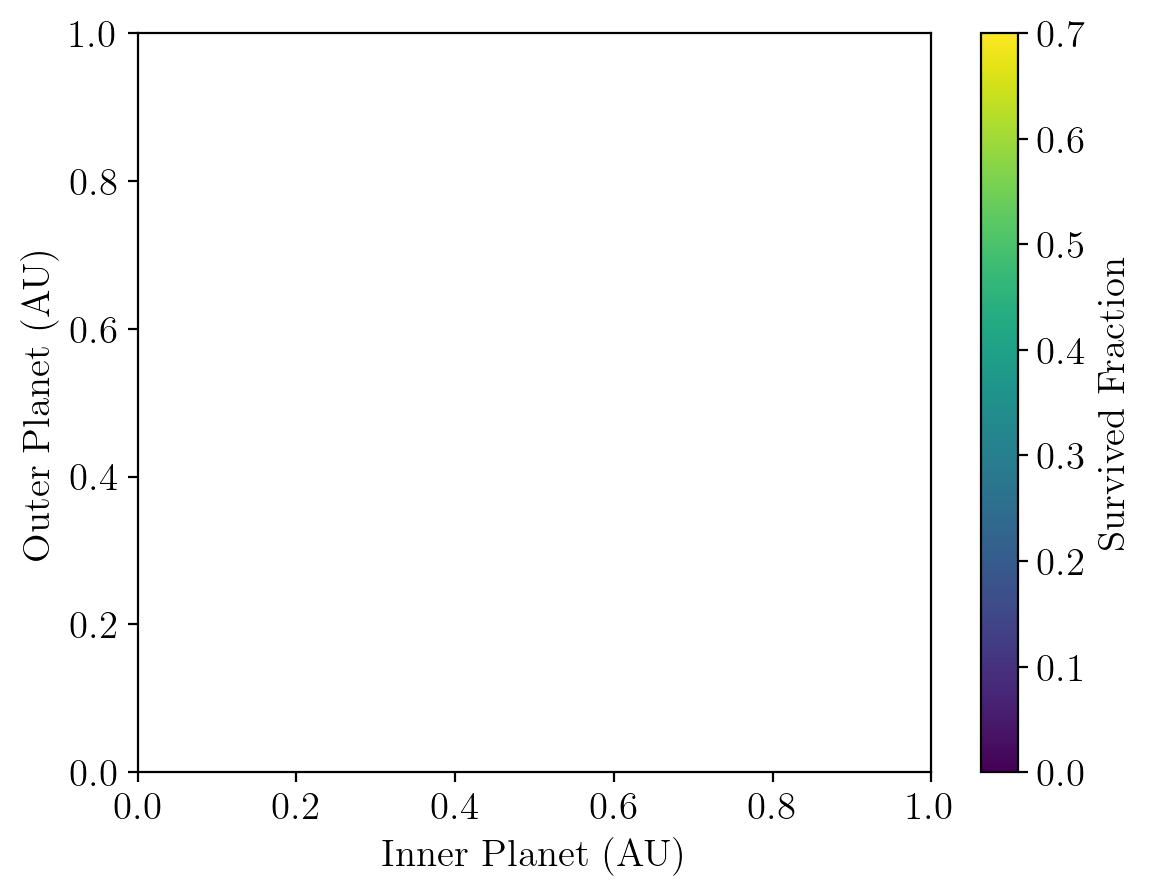

In [6]:
mask = (~np.isnan(d)) * (~np.isnan(m2)) * (~np.isnan(a_f))

hist, x, y = np.histogram2d(a_in[mask], a_out[mask], weights=np.abs(a_f[mask]-d[mask])/d[mask] < 0.3 , bins=15)
bin_counts, _, _ = np.histogram2d(a_in[mask],a_out[mask], bins=15)
hist = hist/bin_counts
plt.imshow(hist, origin="lower", extent=(y.min(), y.max(), x.min(), x.max()), aspect="auto", vmax = 0.7)
plt.colorbar(label="Survived Fraction")
plt.xlabel("Inner Planet (AU)")
plt.ylabel("Outer Planet (AU)")
plt.savefig("2e_survival.eps")


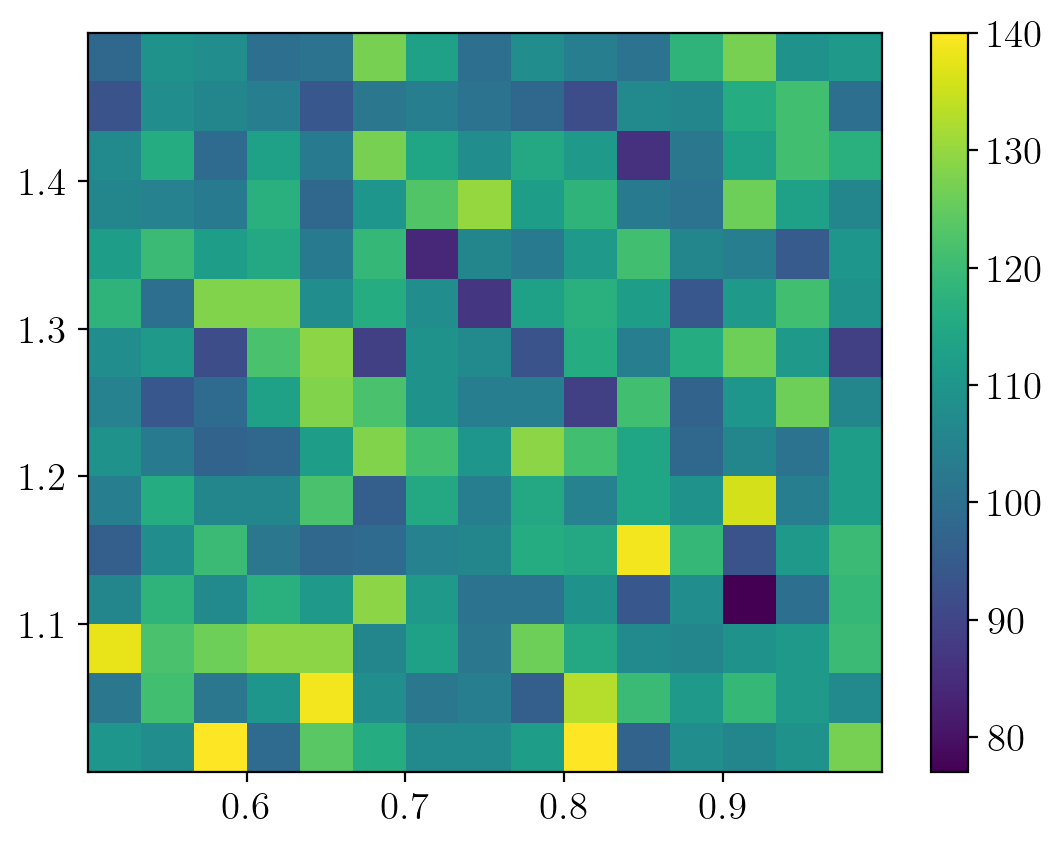

In [6]:
plt.imshow(bin_counts, origin="lower", extent=(y.min(), y.max(), x.min(), x.max()), aspect="auto") 
plt.colorbar()

In [ ]:
np.sum(mask)

16844

In [ ]:
plt.scatter(d, m, c=(a_f>0), alpha=0.1 )
# plt.plot([0,0.5], [.01, .01], "r--")
plt.colorbar()

NameError: name 'plt' is not defined

In [7]:
# labels of the populations
listlablpopl = [r'$\text{sep} > 0.3$', r'$\text{sep}<0.3$']

# number of populations
numbpopl = len(listlablpopl)

# number of samples for each population

# number of features

# generate samples
mask =  (a_f>0) 
listpara = []
listpara.append(np.array([a_in[mask],a_out[mask], a_avg[mask], a_std[mask], a_skew[mask], a_ker[mask]]).T)
mask = (a_f>0)
listpara.append(np.array([a_in[mask],a_out[mask],  a_avg[mask], a_std[mask], a_skew[mask], a_ker[mask]]).T)
# labels of the parameters
listlablpara = [["a_in", ''], ["a_out", ''], ["a_avg", ''], ["a_std", ""], ["a_skew", ""], ["a_ker", ""]]


    
tdpy.plot_grid(listpara, listlablpara, listlablpopl=listlablpopl, boolmakelegd=False, numbbinsplot=10, pathbase="", strgplot="compact_multi")

NameError: name 'a_in' is not defined

In [ ]:
listpara[0].shape

(1249, 4)

In [ ]:
elements = np.load("output/int_test/14/elements.npy")

In [ ]:
np.vstack((a_avg[a_f>0], a_std[a_f>0], a_skew[a_f>0], a_ker[a_f>0])).shape

(4, 7688)

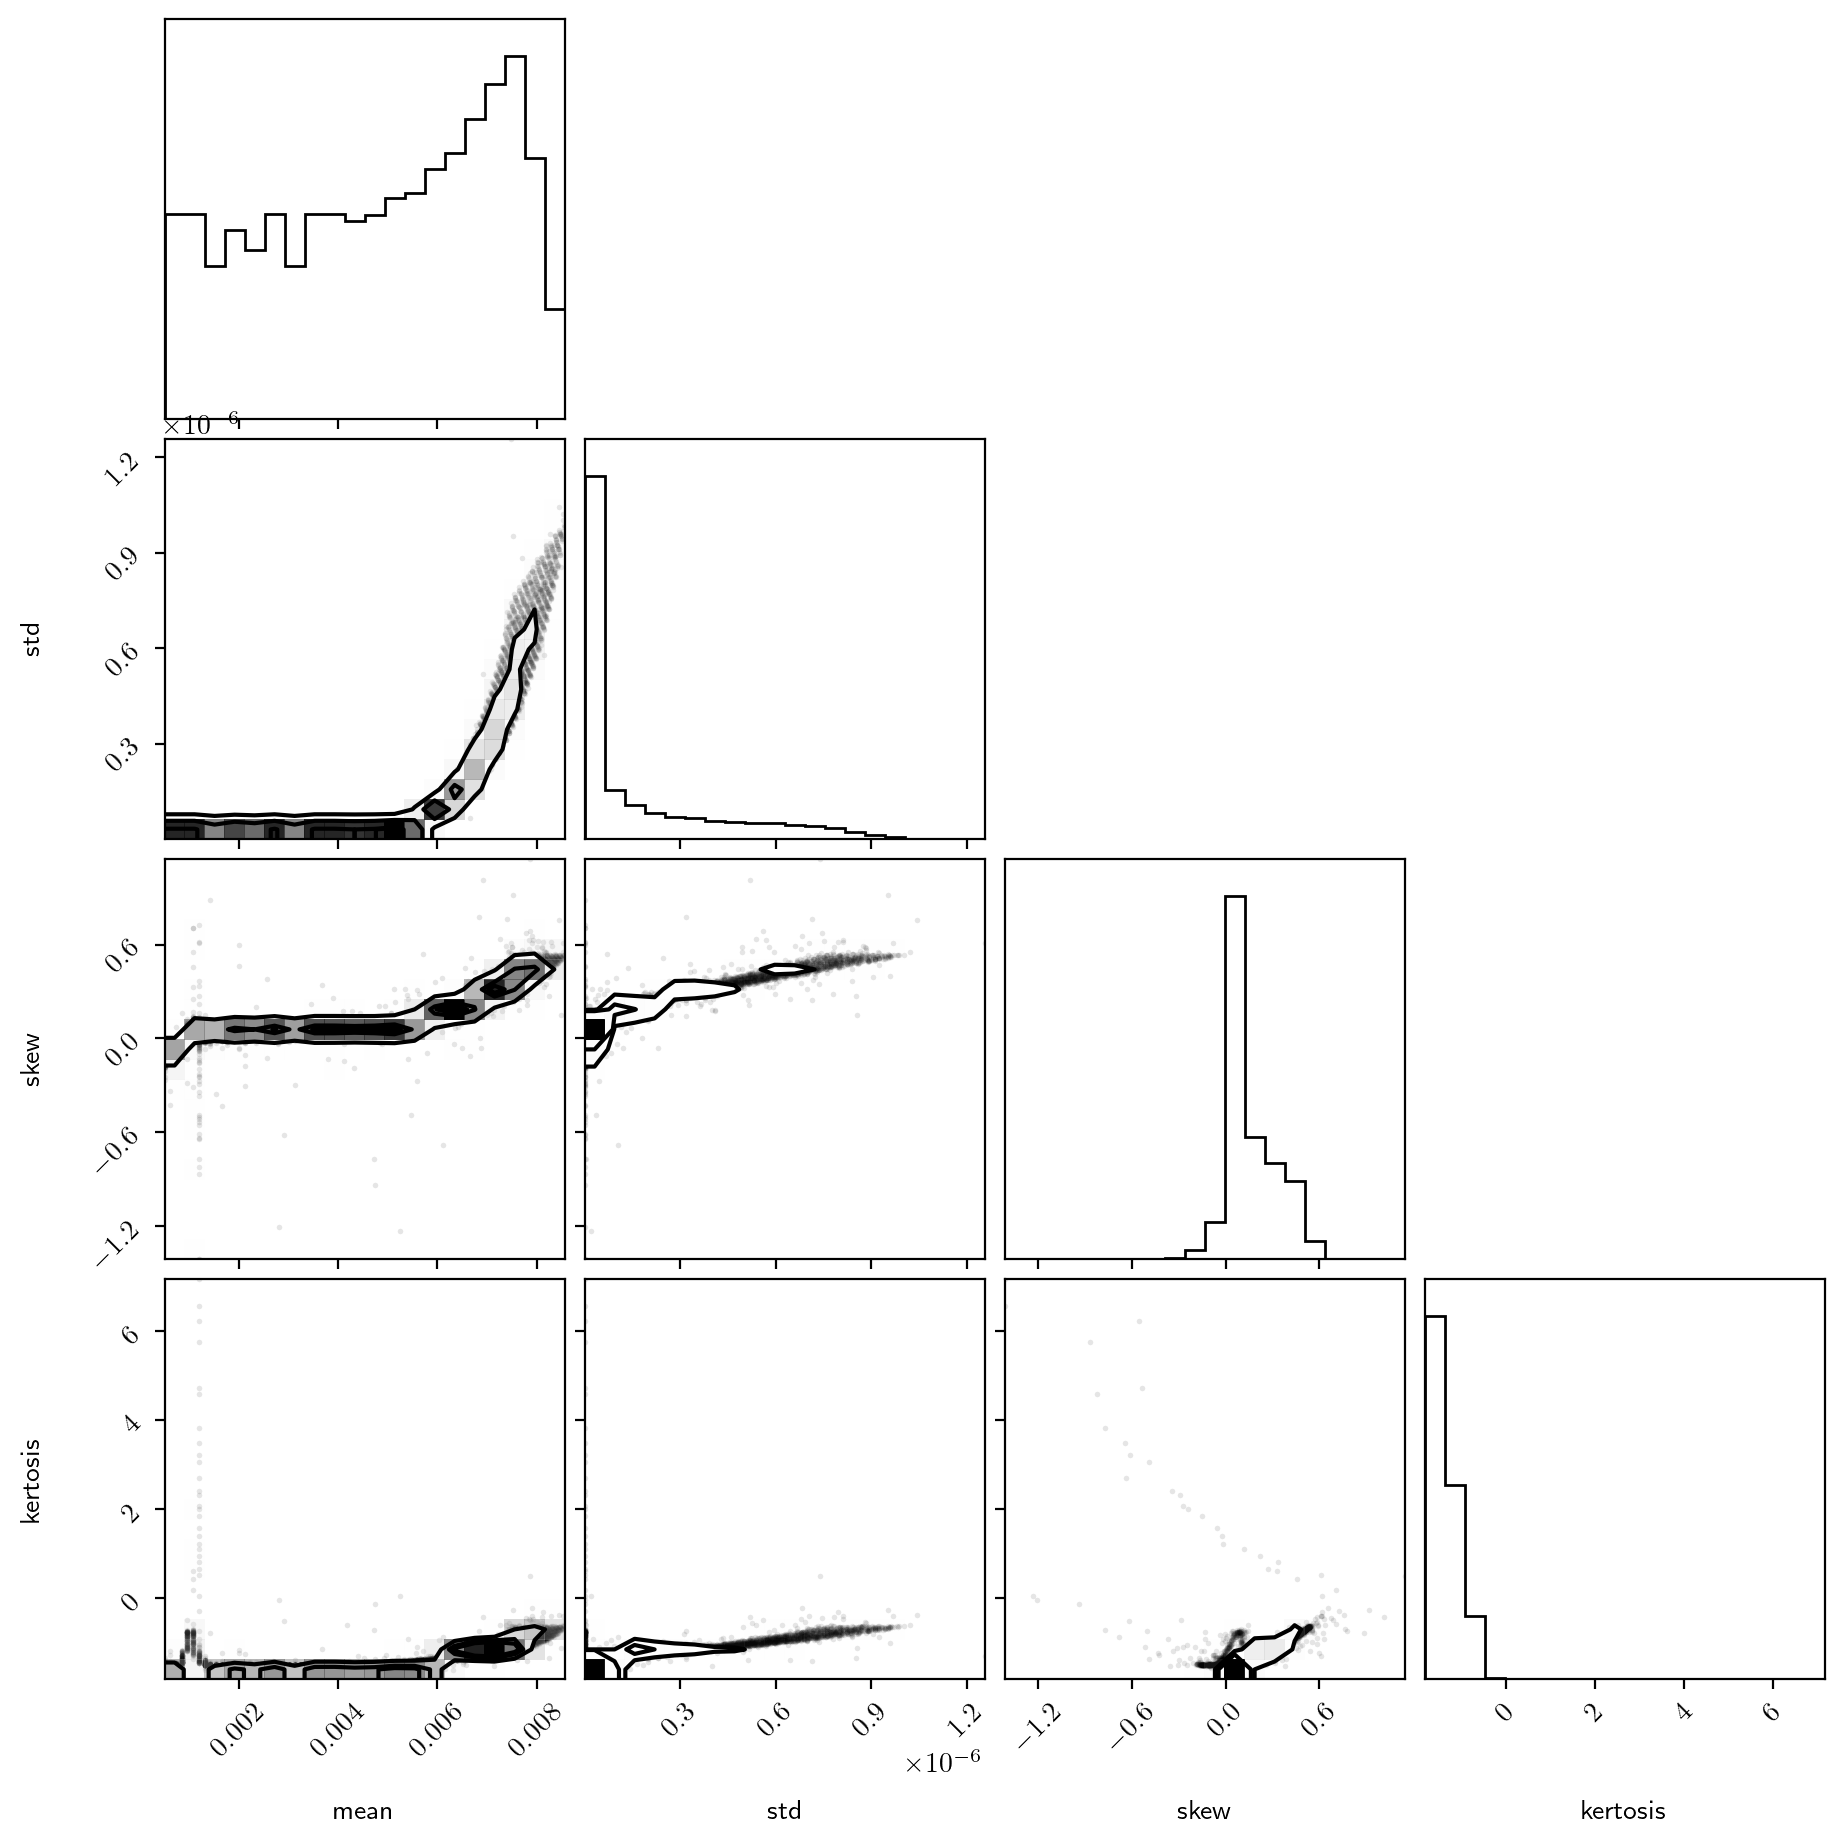

In [ ]:
corner.corner(np.vstack((a_avg[a_f>0], a_std[a_f>0], a_skew[a_f>0], a_ker[a_f>0])).T, labels = ["mean", "std", "skew", "kertosis"])
plt.show()

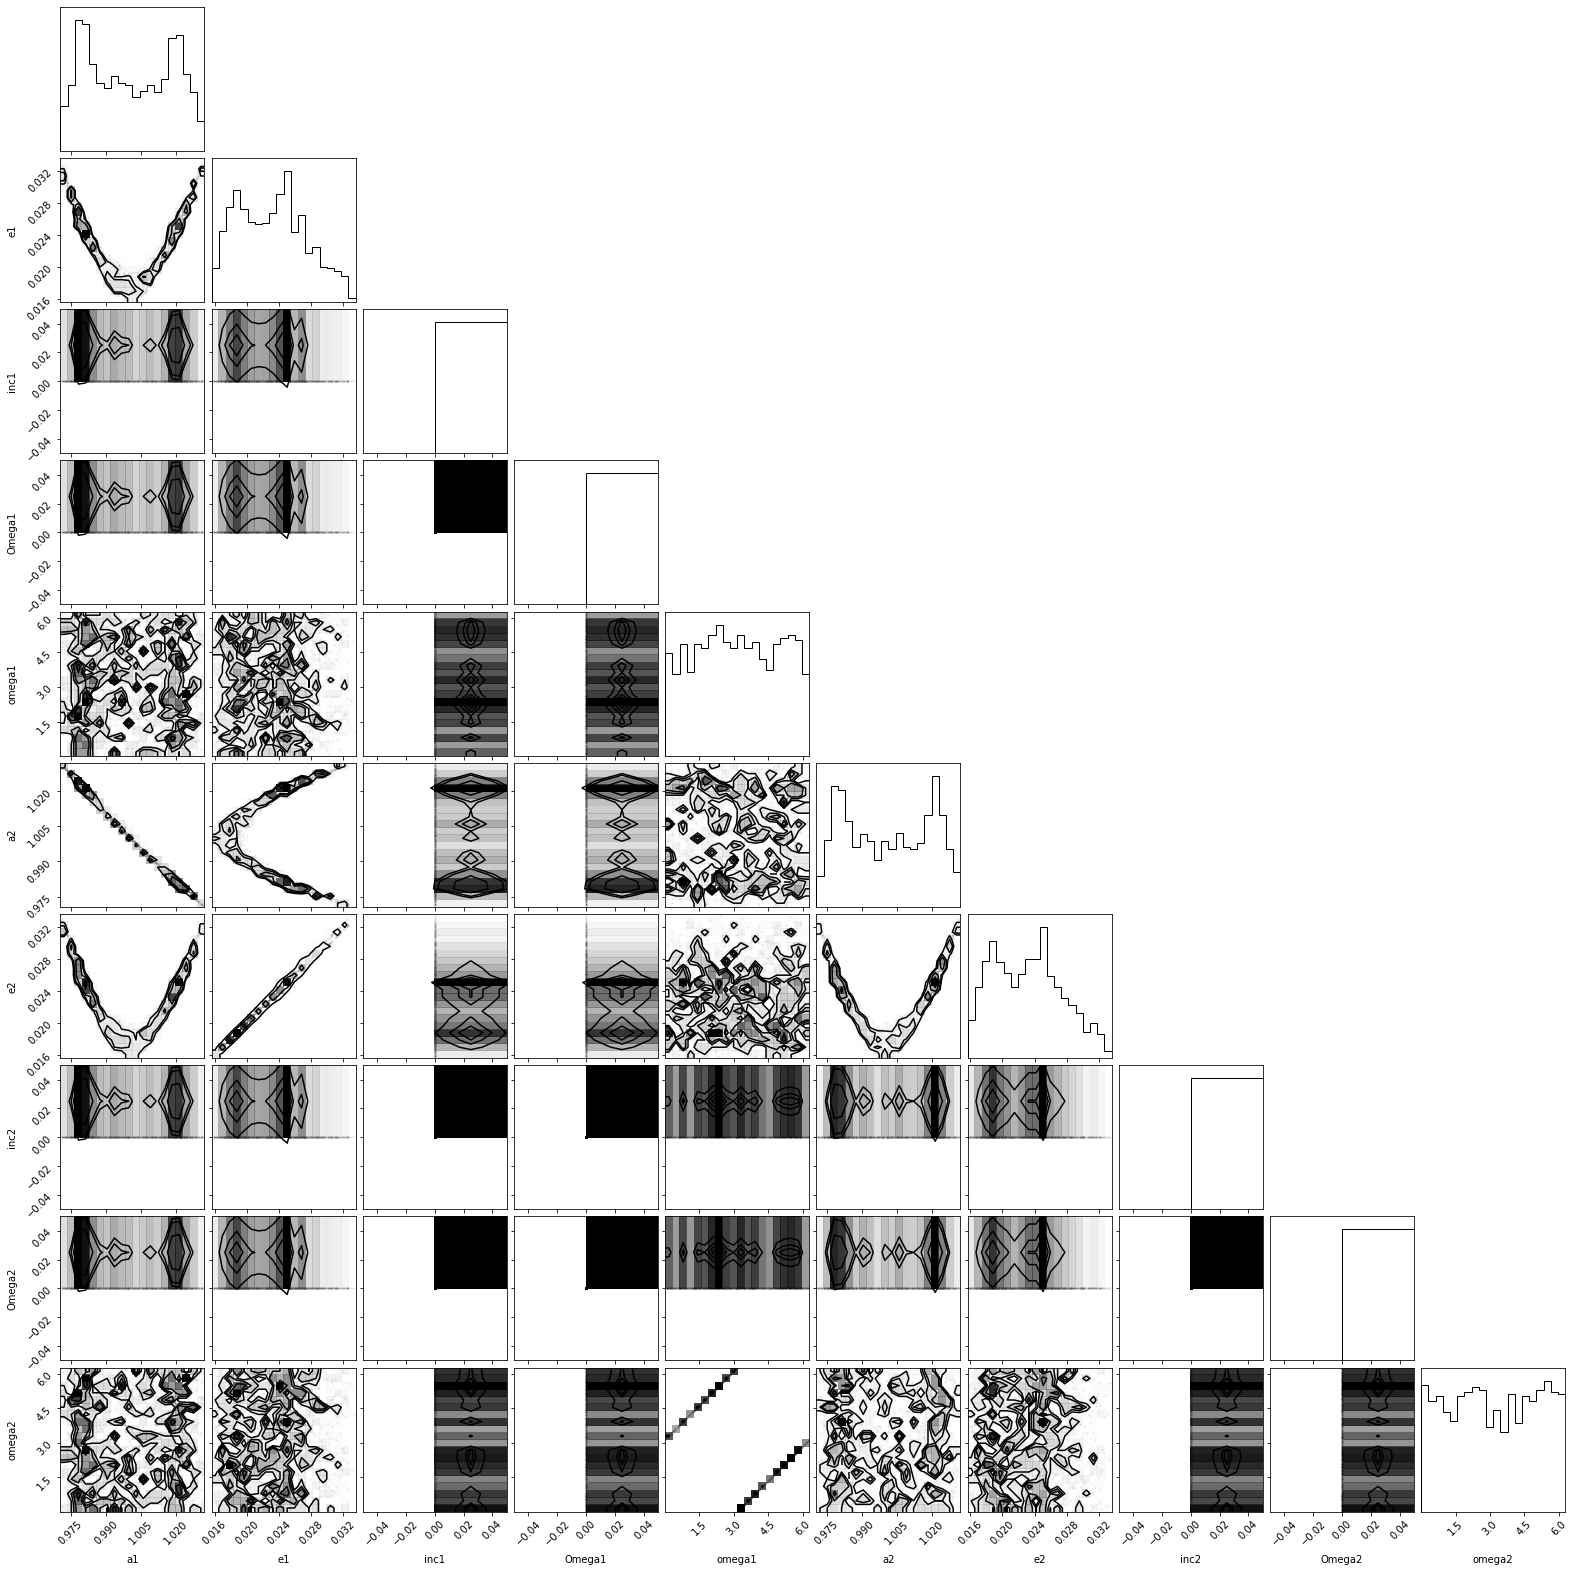

In [ ]:
corner.corner(np.hstack((elements[:,0,:], elements[:,1,:])), range=[.999]*10, labels=["a1", "e1", "inc1", "Omega1", "omega1", "a2", "e2", "inc2", "Omega2", "omega2"])
plt.show()